In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Organization Overview: 
The Toronto Police Service (TPS) is a municipal police force in Toronto, Ontario, Canada. It is the largest municipal police service in Canada, and third largest police force in Canada after the Ontario Provincial Police (OPP) and the Royal Canadian Mounted Police (RCMP).


## Datasets Overview:

* Toronto Police KSI (Killed/Seriously Injured): Identify when, how and where most impactful Killed and Seriously Injured accidents occur to reduce the incidents in neighbourhoods. 

* Toronto Police MCI (Major Crime Indicator): Help Police forces to identify occurrence of MCI based on area, time of day, weekday so that Police Patrols can be delegated accordingly. 


## Descriptive Analysis

#### We tried to answer below questions and make some predictions after analysing it
* 1.  Total number of KSI accidents in the City of Toronto in percentage
* 2.  Total number of different crime types in the City of Toronto in percentage 
* 3.  Trend Visualization for all crimes and KSI accidents by year.
* 4.  What time of the day has the most accidents involved - Daylight, Early Eve, Late Eve, Night - added new attribute
* 5.  Visualization of Location by neighbourhood heat map on both KSI and MSI dataset

## AI Solution

* 6.  Time Seris Forecasting - Forecast next year general trend (Yearly,Monthly)
* 7.  Clustering Neighbourhoods Risk Level

## Import Packages

In [1]:
import numpy as np
import pandas as pd

from pandas.plotting import autocorrelation_plot, scatter_matrix

#visualization 
import matplotlib.pyplot as plt
import seaborn as sea

from pandas import DataFrame, Series
import statsmodels.formula.api as sm

import scipy, scipy.stats

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# Importing everything from forecasting quality metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
import time


### Create a dataframe from the data in csv

In [2]:
mci_df= pd.read_csv('G:\PROJECT\Guide\Data\MCI_2014_to_2019.csv')
ksi_df = pd.read_csv("G:\PROJECT\Guide\Data\Motor Vehicle Collisions with KSI Data.csv")

#### Check MCI dataset

In [3]:

mci_df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-8.840549e+06,5.431712e+06,201,GO-20141301077,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Other,1420,100,Assault With Weapon,...,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,1
1,-8.840549e+06,5.431712e+06,202,GO-20141301077,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Other,1420,100,Assault With Weapon,...,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2
2,-8.840549e+06,5.431712e+06,203,GO-20141301077,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Other,1420,100,Assault With Weapon,...,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,3
3,-8.840549e+06,5.431712e+06,204,GO-20141301077,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Other,1420,100,Assault With Weapon,...,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,4
4,-8.839881e+06,5.413806e+06,205,GO-20141300854,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Commercial,2120,200,B&E,...,7.0,Tuesday,21,Break and Enter,D14,79,University (79),43.665390,-79.410,5


#### Check KSI dataset

In [4]:
ksi_df.head()

,_id,Index_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourhood,ObjectId,geometry
0,1,3389067,893184,2006,2006-01-01T05:00:00,236,2,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),1,"{u'type': u'Point', u'coordinates': (-79.31879..."
1,2,3389068,893184,2006,2006-01-01T05:00:00,236,2,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),2,"{u'type': u'Point', u'coordinates': (-79.31879..."
2,3,3389069,893184,2006,2006-01-01T05:00:00,236,2,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),3,"{u'type': u'Point', u'coordinates': (-79.31879..."
3,4,3389070,893184,2006,2006-01-01T05:00:00,236,2,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),4,"{u'type': u'Point', u'coordinates': (-79.31879..."
4,5,3389071,893184,2006,2006-01-01T05:00:00,236,2,WOODBINE AVE,O CONNOR DR,NaN,...,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),5,"{u'type': u'Point', u'coordinates': (-79.31879..."


### Cleaning data

In [5]:
# Drop Na
mci_df=mci_df.dropna()

In [6]:
# Filter columns to be used
df_MCI=mci_df[['Hood_ID','Division','MCI','occurrencedate','occurrencehour']]
df_MCI['occurrencedate']=pd.to_datetime(df_MCI['occurrencedate']).dt.date
# Filter year
df_MCI=df_MCI.loc[pd.to_datetime(df_MCI['occurrencedate']).dt.year>=2014]

<ipython-input-6-b840112e5ce4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MCI['occurrencedate']=pd.to_datetime(df_MCI['occurrencedate']).dt.date


In [7]:
#Combine same type in the same hour
df_MCI_count=df_MCI
df_MCI_count["Count"] = 1
df_MCI_count=df_MCI_count.groupby(['Hood_ID','Division','MCI','occurrencedate','occurrencehour']).count()

In [8]:
#Sort by Date
df_MCI_count=df_MCI_count.sort_values(['occurrencedate','occurrencehour']).reset_index()
#Rename
df_MCI_count=df_MCI_count.rename(columns={"MCI": "Type", "occurrencedate": "Date","occurrencehour": "Hour"})

In [9]:
#Finish MCI dataset
df_MCI_count.head()

,Hood_ID,Division,Type,Date,Hour,Count
0,1,D23,Break and Enter,2014-01-01,0,1
1,6,D23,Assault,2014-01-01,0,1
2,16,D22,Assault,2014-01-01,0,1
3,16,D22,Theft Over,2014-01-01,0,1
4,20,D22,Assault,2014-01-01,0,1


In [10]:
#Select KSI columns
df_Accident=ksi_df[['Hood_ID','Division','INJURY','DATE','HOUR']]

In [11]:
#Rename to match MCI dataset , Seperate DATE to Month and Day Columns  and 

df_Accident=df_Accident.rename(columns={"INJURY": "Type", "DATE": "Date","HOUR": "Hour"})

df_Accident['Date']=pd.to_datetime(df_Accident['Date']).dt.date


#Only watch 2014 +
df_Accident=df_Accident.loc[pd.to_datetime(df_Accident['Date']).dt.year>=2014]



In [12]:
df_Accident["Count"] = 1
df_Accident=df_Accident.groupby(['Hood_ID','Division','Type','Date','Hour']).count().reset_index()
df_Accident.head()

,Hood_ID,Division,Type,Date,Hour,Count
0,1,23,Fatal,2014-05-21,6,1
1,1,23,Fatal,2014-07-28,5,1
2,1,23,Fatal,2015-11-03,17,1
3,1,23,Fatal,2016-05-24,13,1
4,1,23,Fatal,2016-08-05,18,1


In [13]:
#
df_Accident['Type']=df_Accident['Type']+' Collision'

In [14]:
frames = [df_MCI_count, df_Accident]
df_All= pd.concat(frames)
df_All=df_All.sort_values(by='Date').reset_index(drop=True)

In [15]:
df_All['Year'] = pd.to_datetime(df_All['Date']).dt.year
df_All['Month'] = pd.to_datetime(df_All['Date']).dt.month
df_All['Day']= pd.to_datetime(df_All['Date']).dt.day

In [16]:
df_All.head()

,Hood_ID,Division,Type,Date,Hour,Count,Year,Month,Day
0,1,D23,Break and Enter,2014-01-01,0,1,2014,1,1
1,44,D54,Assault,2014-01-01,12,2,2014,1,1
2,48,D33,Assault,2014-01-01,12,1,2014,1,1
3,48,D33,Theft Over,2014-01-01,12,1,2014,1,1
4,53,D33,Break and Enter,2014-01-01,12,1,2014,1,1


In [18]:
# output for csv for further investgation
df_All.to_csv("./output.csv")

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## Analysis 1.Total number of KSI accidents in the City of Toronto in percentage

In [17]:
df_Accident['Year'] = pd.to_datetime(df_Accident['Date']).dt.year
df_Accident['Month'] = pd.to_datetime(df_Accident['Date']).dt.month
df_Accident['Day']= pd.to_datetime(df_Accident['Date']).dt.day
df_Accident.head()

,Hood_ID,Division,Type,Date,Hour,Count,Year,Month,Day
0,1,23,Fatal Collision,2014-05-21,6,1,2014,5,21
1,1,23,Fatal Collision,2014-07-28,5,1,2014,7,28
2,1,23,Fatal Collision,2015-11-03,17,1,2015,11,3
3,1,23,Fatal Collision,2016-05-24,13,1,2016,5,24
4,1,23,Fatal Collision,2016-08-05,18,1,2016,8,5


In [18]:
pivot_KSI=df_Accident.pivot_table(index=['Year','Type'],values='Count',aggfunc=np.sum)
pivot_KSI

Count
Year Type                    
2014 Fatal Collision       51
     Major Collision      330
     Minimal Collision     67
     Minor Collision       66
     None Collision       397
2015 Fatal Collision       65
     Major Collision      319
     Minimal Collision     65
     Minor Collision       68
     None Collision       411
2016 Fatal Collision       78
     Major Collision      337
     Minimal Collision     69
     Minor Collision       96
     None Collision       423
2017 Fatal Collision       63
     Major Collision      352
     Minimal Collision     83
     Minor Collision       64
     None Collision       417
2018 Fatal Collision       66
     Major Collision      381
     Minimal Collision     50
     Minor Collision      100
     None Collision       467
2019 Fatal Collision       64
     Major Collision      276
     Minimal Collision     50
     Minor Collision       59
     None Collision       356

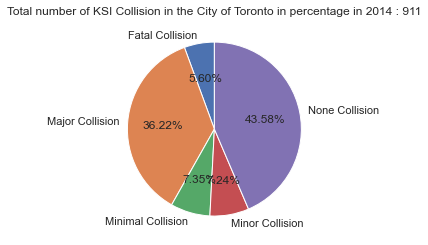

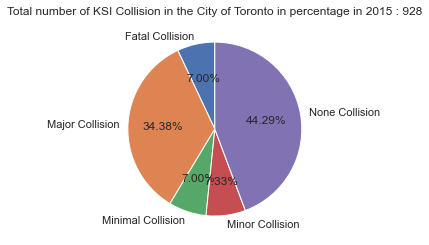

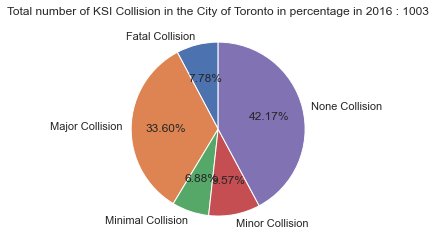

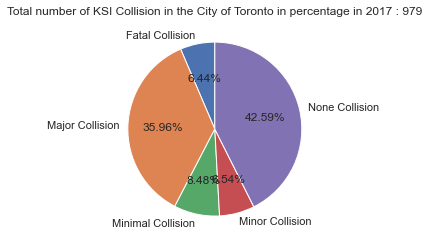

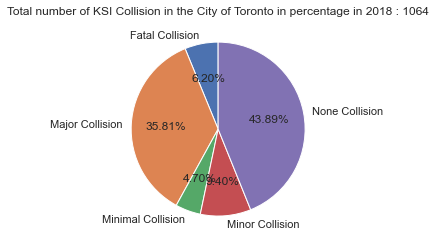

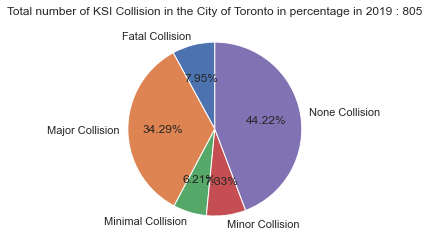

In [19]:
years = df_Accident['Year'].unique()
for year in years:
    y = pivot_KSI.iloc[pivot_KSI.index.get_level_values('Year') == year]['Count']
    total = np.sum(y)
    plt.pie(y, labels = df_Accident['Type'].unique(),autopct='%1.2f%%', startangle=90 )
    plt.title("Total number of KSI Collision in the City of Toronto in percentage in " + str(year) + " : " + str(total))
    plt.show() 

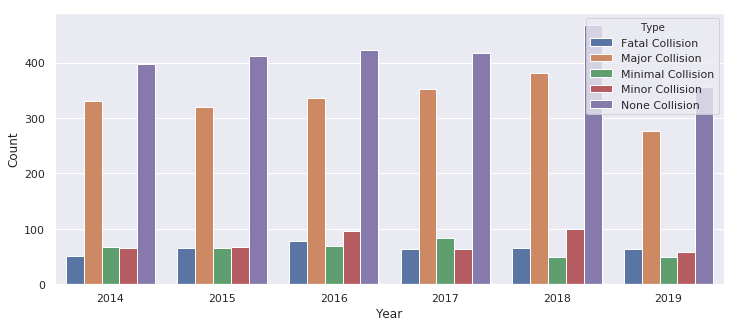

In [22]:
plt.figure(figsize=(12,5))
plt.title = ('Collisions by Year')
sea.barplot(x="Year", y="Count",hue='Type',data=pivot_KSI.reset_index())
plt.show()

## Analysis 2. Total number of different crime types in the City of Toronto in percentage

In [23]:
df_MCI_count['Year'] = pd.to_datetime(df_MCI_count['Date']).dt.year
df_MCI_count['Month'] = pd.to_datetime(df_MCI_count['Date']).dt.month
df_MCI_count['Day']= pd.to_datetime(df_MCI_count['Date']).dt.day
df_MCI_count.head()

,Hood_ID,Division,Type,Date,Hour,Count,Year,Month,Day
0,1,D23,Break and Enter,2014-01-01,0,1,2014,1,1
1,6,D23,Assault,2014-01-01,0,1,2014,1,1
2,16,D22,Assault,2014-01-01,0,1,2014,1,1
3,16,D22,Theft Over,2014-01-01,0,1,2014,1,1
4,20,D22,Assault,2014-01-01,0,1,2014,1,1


In [24]:
pivot_MCI=df_MCI_count.pivot_table(index=['Year','Type'],values='Count',aggfunc=np.sum)
pivot_MCI

Count
Year Type                  
2014 Assault          16395
     Auto Theft        3485
     Break and Enter   7178
     Robbery           3586
     Theft Over         994
2015 Assault          17738
     Auto Theft        3195
     Break and Enter   6899
     Robbery           3464
     Theft Over        1020
2016 Assault          18538
     Auto Theft        3258
     Break and Enter   6387
     Robbery           3613
     Theft Over        1013
2017 Assault          19086
     Auto Theft        3545
     Break and Enter   6877
     Robbery           3898
     Theft Over        1155
2018 Assault          19252
     Auto Theft        4710
     Break and Enter   7595
     Robbery           3531
     Theft Over        1235
2019 Assault          19600
     Auto Theft        5137
     Break and Enter   8278
     Robbery           3408
     Theft Over        1251

TypeError: 'str' object is not callable

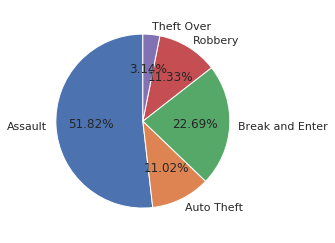

In [25]:
crime_type=['Assault','Auto Theft','Break and Enter','Robbery','Theft Over']
years = df_MCI_count['Year'].unique()
for year in years:
    y = pivot_MCI.iloc[pivot_KSI.index.get_level_values('Year') == year]['Count']
    total = np.sum(y)
    plt.pie(y, labels = crime_type,autopct='%1.2f%%', startangle=90 )
    plt.title("Total number of Crimes in the City of Toronto in percentage in " + str(year) + " : " + str(total))
    plt.show() 

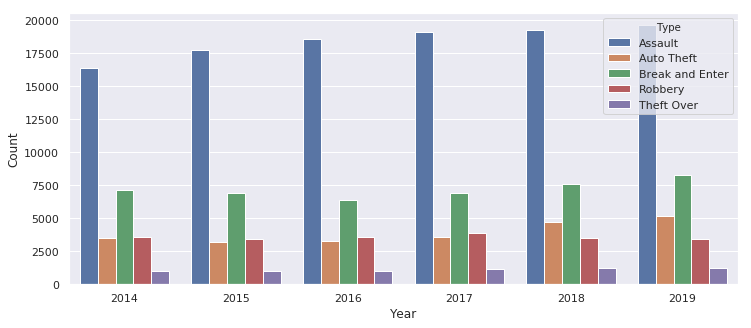

In [26]:
plt.figure(figsize=(12,5))
plt.title = ('Crimes by Year')
sea.barplot(x="Year", y="Count",hue='Type',data=pivot_MCI.reset_index())
plt.show()

## Analysis 3. Trend Visualization for all crimes and KSI accidents by year.

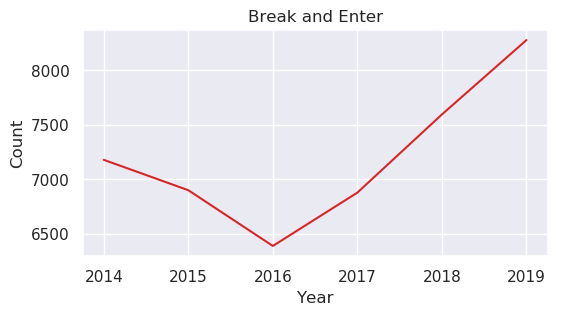

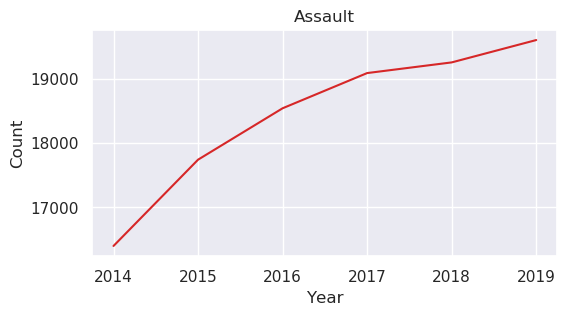

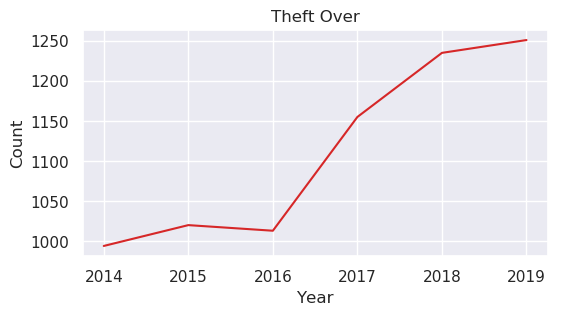

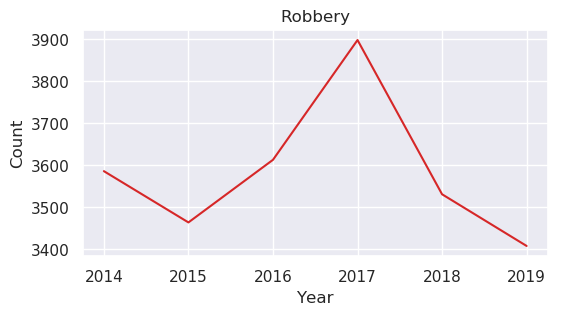

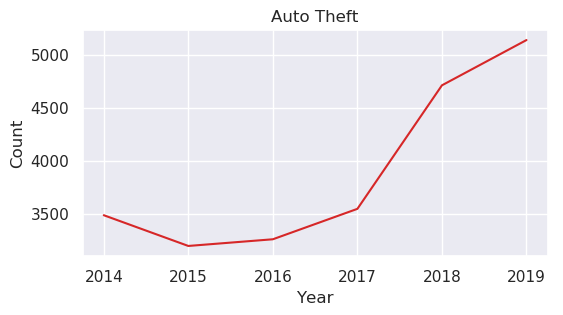

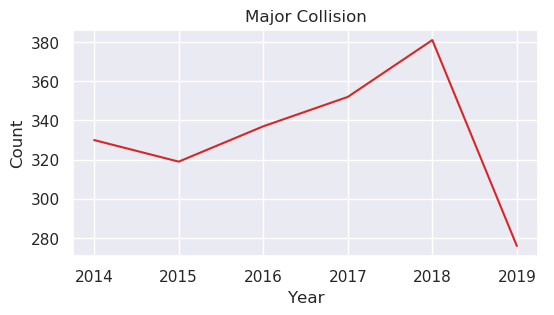

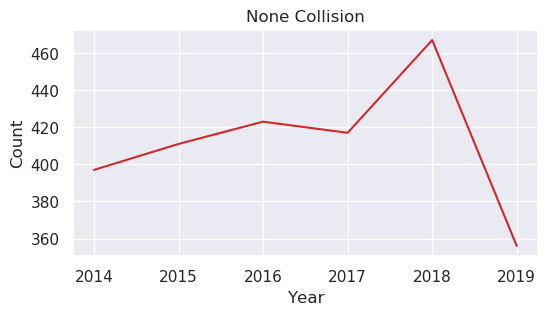

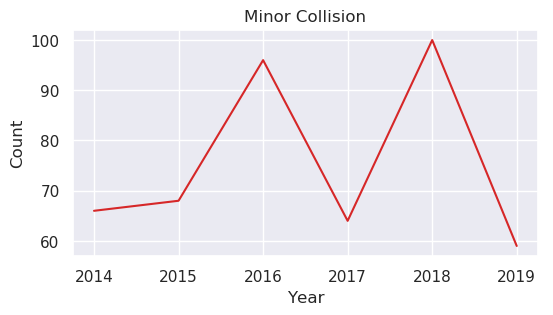

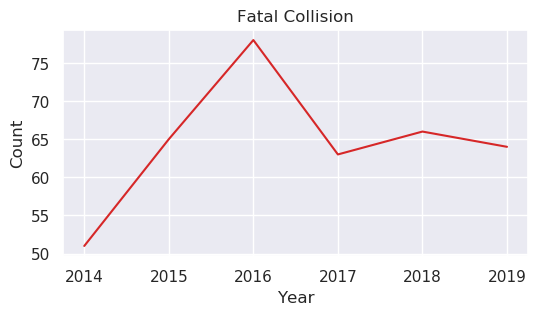

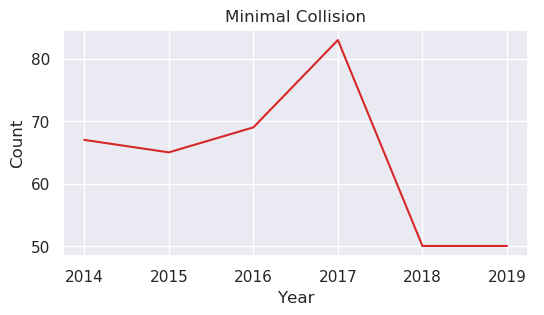

In [27]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Year', ylabel='Count', dpi=100):
    plt.figure(figsize=(6,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
for i in (df_All['Type'].unique()):
    df=df_All.loc[df_All['Type']==i]
    plot_df(df_All, x=df_All.Year.unique(), y=df.groupby('Year')['Count'].agg('sum'), title=i) 

## Analysis 4: What time of the day has the most accidents/crimes involved - Daylight, Early Eve, Late Eve, Night - added new attribute

- First we will define the new attribute "TIMEOFDAY". We define labels or buckets as 
 - 12AM-4AM - [00 to 4 hours]
 - 4AM-8AM - [4 to 8 hours]
 - 8AM-12PM - [8 to 12 hours]
 - 12PM-4PM - [12 to 16 hours]
 - 4PM-8PM - [16 to 20 hours]
 - 8PM-12PM - [20 to Midnight]

In [23]:
bins = [0, 4, 8, 12, 16, 20, np.inf]
labels = ['12AM-4AM', '4AM-8AM','8AM-12PM', '12PM-4PM', '4PM-8PM', '8PM-12PM']


### KSI accidents

In [24]:
df_Accident["TIMEOFDAY"] = pd.cut(df_Accident["Hour"], bins, labels = labels)
df_Accident.groupby('TIMEOFDAY')['Count'].agg('sum')

TIMEOFDAY
12AM-4AM     625
4AM-8AM      702
8AM-12PM     895
12PM-4PM    1247
4PM-8PM     1430
8PM-12PM     784
Name: Count, dtype: int64

In [27]:
df_Accident_time = pd.DataFrame(df_Accident.groupby(['TIMEOFDAY','Type'])['Count'].agg('sum'))
df_Accident_time

Count
TIMEOFDAY Type                    
12AM-4AM  Fatal Collision       50
          Major Collision      229
          Minimal Collision     63
          Minor Collision       76
          None Collision       207
4AM-8AM   Fatal Collision       48
          Major Collision      257
          Minimal Collision     43
          Minor Collision       53
          None Collision       301
8AM-12PM  Fatal Collision       78
          Major Collision      305
          Minimal Collision     44
          Minor Collision       65
          None Collision       403
12PM-4PM  Fatal Collision       68
          Major Collision      433
          Minimal Collision     89
          Minor Collision      106
          None Collision       551
4PM-8PM   Fatal Collision      100
          Major Collision      485
          Minimal Collision    103
          Minor Collision       90
          None Collision       652
8PM-12PM  Fatal Collision       43
          Major Collision      283
          Minimal Collision     39
          Minor Collision       63
          None Collision       356

### Visualization

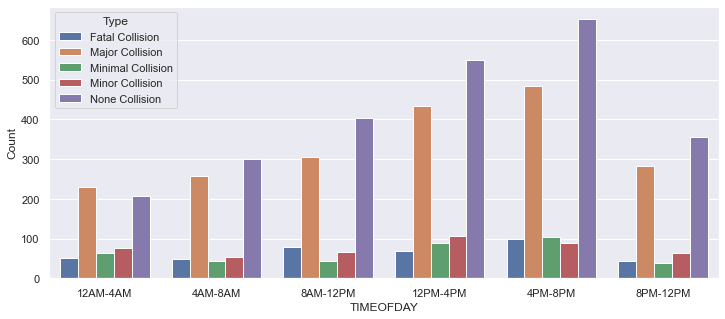

In [28]:

plt.figure(figsize=(12,5))
plt.title = ('Time of the day for accidents')
sea.barplot(x="TIMEOFDAY", y="Count",hue='Type',data=df_Accident_time.reset_index())

plt.show()

### Analysis

- It is clear that most of the accidents occured during hours start from 4PM to 8PM, which is the time when people try to reach home after work. 
- Another point to be noted here is, 12PM to 4PM has the second highest accidents, around lunch hours to afternoon. 
- Most of the accidents occured in Daylight from 8AM to 8PM, which is mainly office hours. 

### MCI crimes

In [29]:
df_MCI_count["TIMEOFDAY"] = pd.cut(df_MCI_count["Hour"], bins, labels = labels)
df_MCI_count.groupby('TIMEOFDAY')['Count'].agg('sum')

TIMEOFDAY
12AM-4AM    29314
4AM-8AM     17765
8AM-12PM    33132
12PM-4PM    36674
4PM-8PM     42736
8PM-12PM    32545
Name: Count, dtype: int64

In [30]:
df_MCI_time = pd.DataFrame(df_MCI_count.groupby(['TIMEOFDAY','Type'])['Count'].agg('sum'))
df_MCI_time

Count
TIMEOFDAY Type                  
12AM-4AM  Assault          15716
          Auto Theft        2118
          Break and Enter   7649
          Robbery           3417
          Theft Over         414
4AM-8AM   Assault           8124
          Auto Theft        2188
          Break and Enter   6034
          Robbery            993
          Theft Over         426
8AM-12PM  Assault          18386
          Auto Theft        2832
          Break and Enter   8149
          Robbery           2220
          Theft Over        1545
12PM-4PM  Assault          21368
          Auto Theft        2994
          Break and Enter   6717
          Robbery           4201
          Theft Over        1394
4PM-8PM   Assault          23268
          Auto Theft        5856
          Break and Enter   7122
          Robbery           5017
          Theft Over        1473
8PM-12PM  Assault          16893
          Auto Theft        5830
          Break and Enter   4597
          Robbery           4486
          Theft Over         739

### Visulization

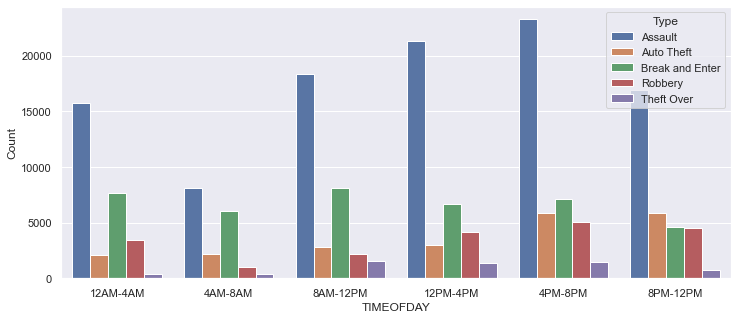

In [31]:
plt.figure(figsize=(12,5))

sea.barplot(x="TIMEOFDAY", y="Count",hue='Type',data=df_MCI_time.reset_index())
plt.title = ('Time of the day for crimes')
plt.show()

### Analysis

- It is clear that most of the crimes occured during hours start from 4PM to 8PM, which is the time when people try to reach home after work. ,Most of them are Assualt
- Another point to be noted here is, 4AM-8AM is the least crimes time period.
- Most of the Break and Enter happened from 12 AM to 4 AM, which is midnight

## Analysis 5. Visualization of Location by neighbourhood heat map on both KSI and MSI dataset

In [35]:
import geopandas as gpd
sns.set(style="darkgrid")
%matplotlib inline

In [36]:
regions = gpd.read_file('../input/folder/forAnalysis/Neighbourhoods/Neighbourhoods.shp')

regions['neighbourhood'] = regions['FIELD_7'].str.replace(' \(.+\)', '').str.lower()
regions.sample(5)

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,neighbourhood
47,2148,25886515,25926709,49885,139,139,Scarborough Village (139),Scarborough Village (139),None,None,-79.216813,43.738652,16492257,6.040096e+06,10973.560768,POLYGON ((-79.21396937581029 43.72676412748979...,scarborough village
90,2191,25886663,25926752,49885,41,41,Bridle Path-Sunnybrook-York Mills (41),Bridle Path-Sunnybrook-York Mills (41),None,None,-79.378904,43.731013,16492945,1.693914e+07,21666.018365,POLYGON ((-79.39007651184855 43.72768216572467...,bridle path-sunnybrook-york mills
112,2213,25886733,25926774,49885,5,5,Elms-Old Rexdale (5),Elms-Old Rexdale (5),None,None,-79.548983,43.721519,16493297,5.616463e+06,12955.634989,"POLYGON ((-79.5551162536014 43.71510245969922,...",elms-old rexdale
18,2119,25886935,25926680,49885,73,73,Moss Park (73),Moss Park (73),None,None,-79.367297,43.656518,16491793,2.701395e+06,8578.017946,"POLYGON ((-79.3517417941799 43.65556567543358,...",moss park
6,2107,25886627,25926668,49885,38,38,Lansing-Westgate (38),Lansing-Westgate (38),None,None,-79.424748,43.754271,16491601,1.025436e+07,15391.584157,"POLYGON ((-79.4399843054519 43.76155765753231,...",lansing-westgate


In [37]:
df_Accident_Neighbourhood = df_Accident.groupby(['Hood_ID'])['Count'].agg('sum')
df_Accident_Neighbourhood.sort_values(ascending=False).head(10)


Hood_ID
77     185
1      170
137    161
119    161
14     132
76     125
131    114
70     105
73     103
42      96
Name: Count, dtype: int64

In [38]:
merged = regions.set_index('FIELD_5').join(df_Accident_Neighbourhood)
merged = merged.reset_index()
merged = merged.fillna(0)
merged[['FIELD_7', 'FIELD_11', 'FIELD_12', 'geometry', 'Count']].sample(5)

,FIELD_7,FIELD_11,FIELD_12,geometry,Count
124,High Park-Swansea (87),-79.467872,43.645065,POLYGON ((-79.49262120238915 43.64743635154555...,58
43,Rosedale-Moore Park (98),-79.379669,43.682820,"POLYGON ((-79.36339078803182 43.6753226406503,...",30
54,Taylor-Massey (61),-79.295901,43.694998,POLYGON ((-79.28775649834749 43.68977881739397...,11
47,Scarborough Village (139),-79.216813,43.738652,POLYGON ((-79.21396937581029 43.72676412748979...,36
87,Black Creek (24),-79.521979,43.764890,POLYGON ((-79.53488145398656 43.77268813626677...,18


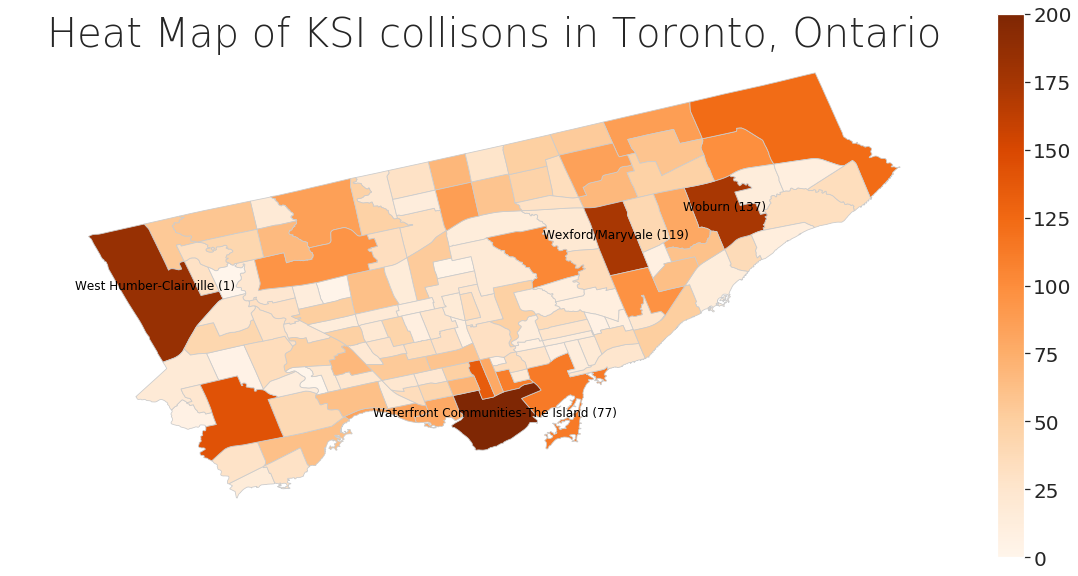

In [39]:
# we are using the maximum and minimum count values from the previous cell.
# setting additionally properties for the plot such as titles, turning of the axis for better visibility
# and setting the color scheme to look like a heat map.
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Heat Map of KSI collisons in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})


# Create colorbar as a legend
# empty array for the data range
# add the colorbar to the figure
# set the color bar label text size
color = 'Oranges'
vmin, vmax = 0, 200
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)


# actually plot the map
merged.plot('Count', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in merged.iterrows():
    if(row['Count'] > 140):
        plt.annotate(s=row['FIELD_7'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()


In [32]:
df_MCI_Neighbourhood = df_MCI_count.groupby(['Hood_ID'])['Count'].agg('sum')
df_MCI_Neighbourhood.sort_values(ascending=False).head(10)


Hood_ID
77     7707
76     6800
75     6217
1      5680
73     4768
27     3967
26     3951
78     3812
137    3779
136    3478
Name: Count, dtype: int64

In [41]:
MCI_merged = regions.set_index('FIELD_5').join(df_MCI_Neighbourhood)
MCI_merged = MCI_merged.reset_index()
MCI_merged = MCI_merged.fillna(0)
MCI_merged[['FIELD_7', 'FIELD_11', 'FIELD_12', 'geometry', 'Count']].sample(5)

,FIELD_7,FIELD_11,FIELD_12,geometry,Count
36,Playter Estates-Danforth (67),-79.354887,43.679700,"POLYGON ((-79.36339078803182 43.6753226406503,...",704
86,Birchcliffe-Cliffside (122),-79.265093,43.694682,POLYGON ((-79.28406044800691 43.68081143978102...,1721
48,South Parkdale (85),-79.439338,43.636700,POLYGON ((-79.42777547646074 43.62979347451697...,2108
115,Etobicoke West Mall (13),-79.568939,43.645063,"POLYGON ((-79.5595857324432 43.63623823882019,...",515
137,Kingsview Village-The Westway (6),-79.547863,43.698993,POLYGON ((-79.55235701287408 43.70946928110742...,1246


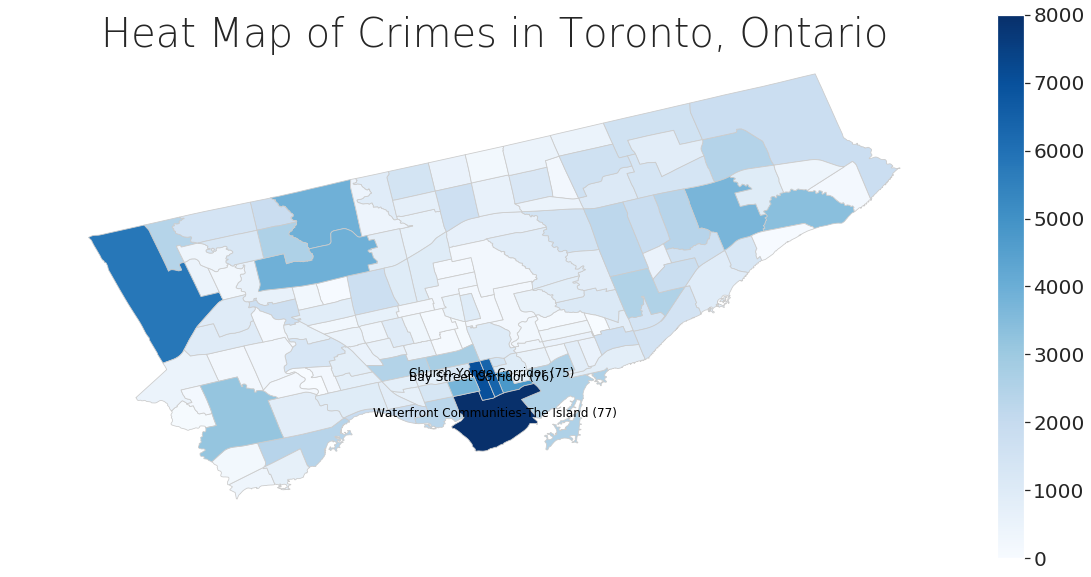

In [42]:
# we are using the maximum and minimum count values from the previous cell.
# setting additionally properties for the plot such as titles, turning of the axis for better visibility
# and setting the color scheme to look like a heat map.
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Heat Map of Crimes in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})


# Create colorbar as a legend
# empty array for the data range
# add the colorbar to the figure
# set the color bar label text size
color = 'Blues'
vmin, vmax = 0,8000
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)


# actually plot the map
MCI_merged.plot('Count', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in MCI_merged.iterrows():
    if(row['Count'] > 6000):
        plt.annotate(s=row['FIELD_7'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()


## AI Solution 6. TIME SERIES FORECASTING - Forecast next year general trend (Yearly,Monthly)


In [34]:
import warnings                                  # do not disturbe mode
warnings.filterwarnings('ignore')

# Load packages
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
from datetime import datetime

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# Importing everything from forecasting quality metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

data = pd.read_csv("G:\PROJECT\Guide\Data\output (1).csv")

data['Time'] = pd.to_datetime(data['Month'])

df = data.groupby(['Time']).sum()

In [35]:
df_2 = data.groupby(['Time', 'Type']).sum()
def create_sub_df(type_of_crime):
  return df_2[np.in1d(df_2.index.get_level_values(1), type_of_crime)]
assault = create_sub_df('Assault')
assault.index = assault.index.droplevel(1)
auto_theft = create_sub_df('Auto Theft')
auto_theft.index = auto_theft.index.droplevel(1)
break_and_enter = create_sub_df('Break and Enter')
break_and_enter.index = break_and_enter.index.droplevel(1)
fatal_collision = create_sub_df('Fatal Collision')
fatal_collision.index = fatal_collision.index.droplevel(1)
major_collision = create_sub_df('Major Collision')
major_collision.index = major_collision.index.droplevel(1)
minimal_collision = create_sub_df('Minimal Collision')
minimal_collision.index = minimal_collision.index.droplevel(1)
minor_collision = create_sub_df('Minor Collision')
minor_collision.index = minor_collision.index.droplevel(1)
none_collision = create_sub_df('None Collision')
none_collision.index = none_collision.index.droplevel(1)
robbery = create_sub_df('Robbery')
robbery.index = robbery.index.droplevel(1)
thetf_over = create_sub_df('Theft Over')
thetf_over.index = thetf_over.index.droplevel(1)

In [36]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 50 must be < 36.

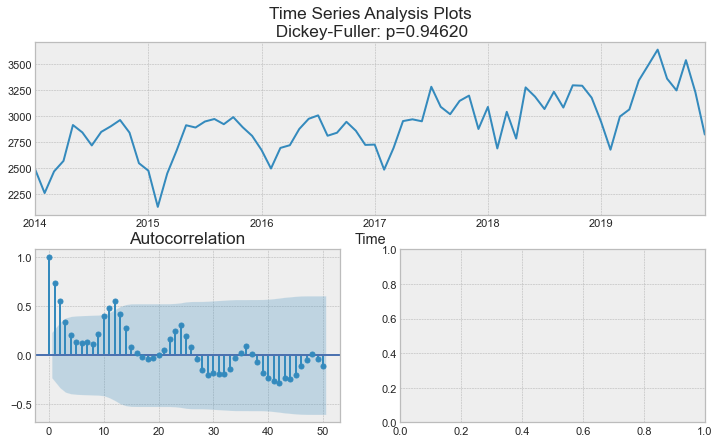

In [37]:
tsplot(df.Count, lags=50)

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 50 must be < 30.

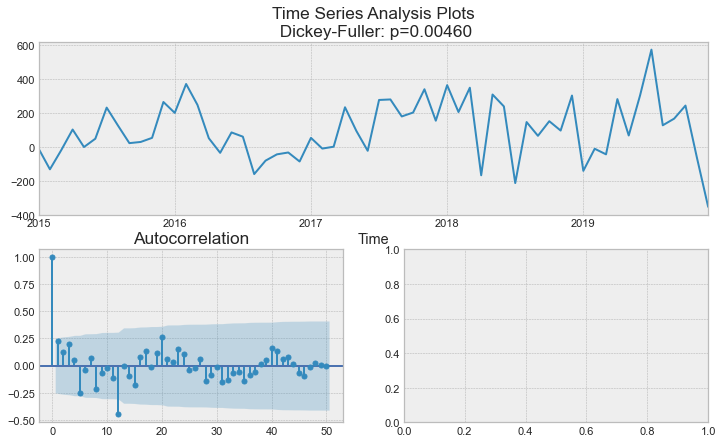

In [38]:
ads_diff = df.Count - df.Count.shift(12)
tsplot(ads_diff[12:], lags=50)

In [39]:

# setting initial values and some bounds for them
ps = range(2, 5)
d = 0 
qs = range(2, 5)
Ps = range(0, 2)
D = 1 
Qs = range(0, 2)
s = 12 # season length is still 12

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)


36

In [40]:

def optimizeSARIMA(parameters_list, d, D, s):
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(df.Count, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table


In [41]:
result_table = optimizeSARIMA(parameters_list, d, D, s)

  0%|          | 0/36 [00:00<?, ?it/s]

In [42]:
p, q, P, Q = result_table.parameters[0]
model_total=sm.tsa.statespace.SARIMAX(df.Count, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=-1)

In [43]:
ss = df.Count
ss.columns = ['actual']
ss

Time
2014-01-01    2485
2014-02-01    2259
2014-03-01    2467
2014-04-01    2568
2014-05-01    2913
              ... 
2019-08-01    3359
2019-09-01    3246
2019-10-01    3537
2019-11-01    3229
2019-12-01    2822
Name: Count, Length: 72, dtype: int64

In [44]:
def plotSARIMA(series, model, n_steps):
    # adding model values
    data = series.copy()
    data['actual'] = data[:]
    data['sarima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model due to the differentiating
    data['sarima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward
    forecast = model.predict(start = data.shape[0]-2, end = data.shape[0]+n_steps-2)
    forecast = data.sarima_model.append(forecast)
    
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['sarima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    #plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    #plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label='actual')
    plt.legend()
    plt.show()
    return(forecast)

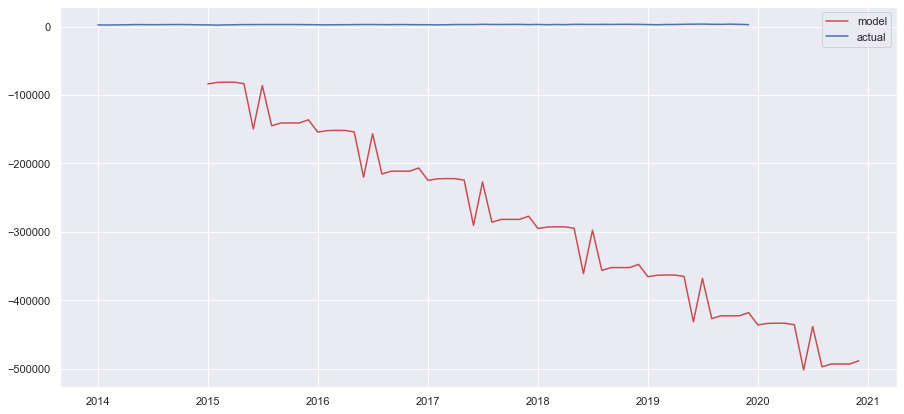

2014-01-01              NaN
2014-02-01              NaN
2014-03-01              NaN
2014-04-01              NaN
2014-05-01              NaN
                  ...      
2020-08-01   -497100.520171
2020-09-01   -493005.356172
2020-10-01   -493005.355981
2020-11-01   -493005.356173
2020-12-01   -488344.957899
Length: 84, dtype: float64

In [45]:
# Total Prediction
prediction_total = plotSARIMA(df.Count, model_total, 11)
prediction_total

In [46]:
print('Total Crimes prediction for 2020')
prediction_total['2020-03-01']+prediction_total['2020-04-01']+prediction_total['2020-05-01']+prediction_total['2020-06-01']+prediction_total['2020-07-01']+prediction_total['2020-08-01']+prediction_total['2020-09-01']+prediction_total['2020-10-01']+prediction_total['2020-11-01']+prediction_total['2020-12-01']+prediction_total['2020-01-01']+prediction_total['2020-02-01']

Total Crimes prediction for 2020


-5576834.7852041265

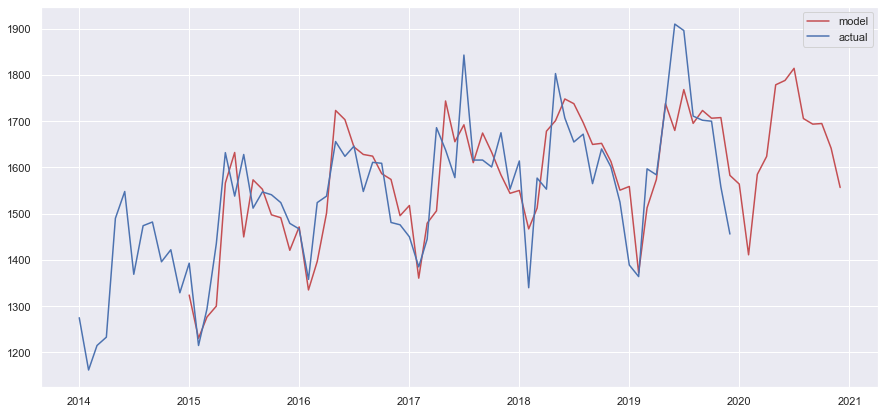

2014-01-01            NaN
2014-02-01            NaN
2014-03-01            NaN
2014-04-01            NaN
2014-05-01            NaN
                 ...     
2020-08-01    1705.744980
2020-09-01    1693.645235
2020-10-01    1694.960700
2020-11-01    1641.541613
2020-12-01    1556.652138
Length: 84, dtype: float64

In [47]:
# Assault Prediction
model_assault=sm.tsa.statespace.SARIMAX(assault.Count, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=-1)
prediction_assault = plotSARIMA(assault.Count, model_assault, 11)
prediction_assault

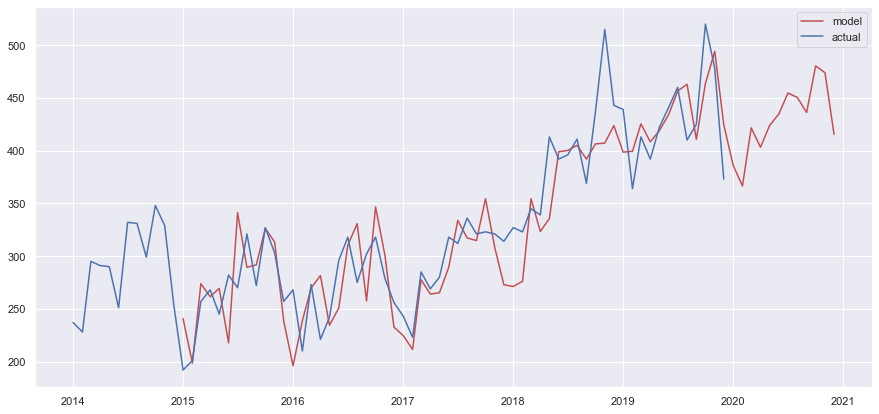

2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
                 ...    
2020-08-01    450.484089
2020-09-01    436.172577
2020-10-01    480.334509
2020-11-01    473.909144
2020-12-01    415.476603
Length: 84, dtype: float64

In [48]:
# Auto Theft Prediction
model_auto_theft=sm.tsa.statespace.SARIMAX(auto_theft.Count, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=-1)
prediction_auto_theft = plotSARIMA(auto_theft.Count, model_auto_theft, 11)
prediction_auto_theft

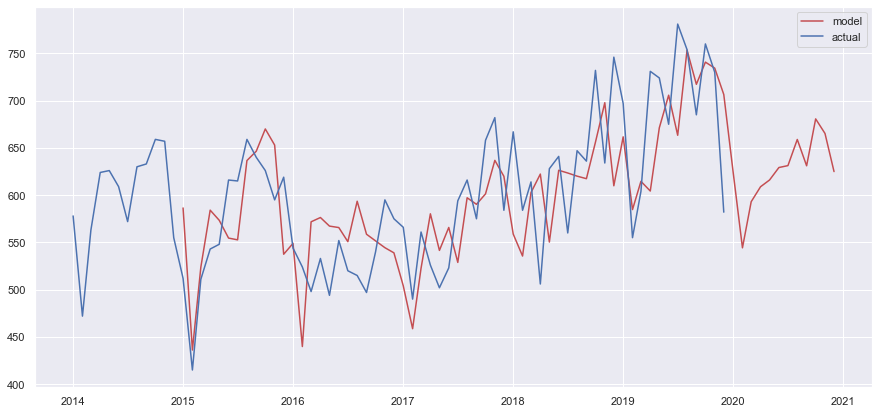

2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
                 ...    
2020-08-01    658.911030
2020-09-01    631.066720
2020-10-01    680.675838
2020-11-01    665.267601
2020-12-01    624.943946
Length: 84, dtype: float64

In [49]:
# Break and Enter Prediction
model_break_and_enter=sm.tsa.statespace.SARIMAX(break_and_enter.Count, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=-1)
prediction_break_and_enter = plotSARIMA(break_and_enter.Count, model_break_and_enter, 11)
prediction_break_and_enter

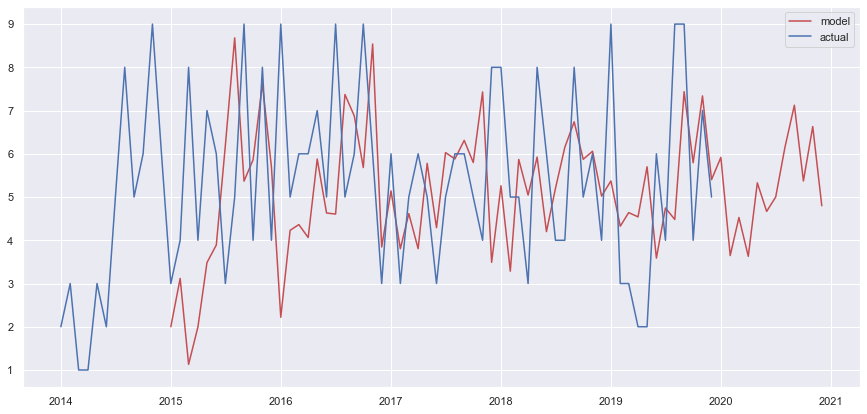

2014-01-01         NaN
2014-02-01         NaN
2014-03-01         NaN
2014-04-01         NaN
2014-05-01         NaN
                ...   
2020-08-01    6.159503
2020-09-01    7.123690
2020-10-01    5.370882
2020-11-01    6.629910
2020-12-01    4.798407
Length: 84, dtype: float64

In [50]:
# Fatal Collision Prediction
model_fatal_collision=sm.tsa.statespace.SARIMAX(fatal_collision.Count, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=-1)
prediction_fatal_collision = plotSARIMA(fatal_collision.Count, model_fatal_collision, 11)
prediction_fatal_collision

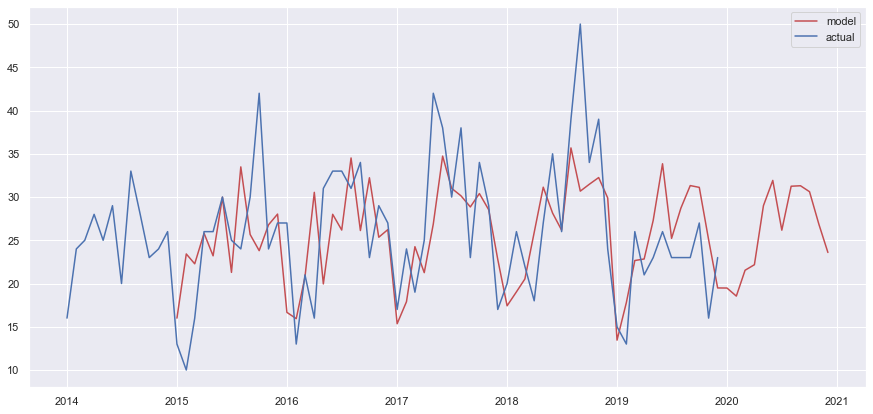

2014-01-01          NaN
2014-02-01          NaN
2014-03-01          NaN
2014-04-01          NaN
2014-05-01          NaN
                ...    
2020-08-01    31.250982
2020-09-01    31.304841
2020-10-01    30.616015
2020-11-01    26.859925
2020-12-01    23.590913
Length: 84, dtype: float64

In [51]:
# Major Collision Prediction
model_major_collision=sm.tsa.statespace.SARIMAX(major_collision.Count, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=-1)
prediction_major_collision = plotSARIMA(major_collision.Count, model_major_collision, 11)
prediction_major_collision

# AI Solution 7. Clustering Neighbourhoods

In [53]:
df_All["TIMEOFDAY"] = pd.cut(df_All["Hour"], bins, labels = labels)
df_All_time = pd.DataFrame(df_All.groupby(['Hood_ID','TIMEOFDAY','Type'])['Count'].agg('sum'))
df_All_time.head()

Count
Hood_ID TIMEOFDAY Type                  
1       12AM-4AM  Assault            232
                  Auto Theft         209
                  Break and Enter    209
                  Fatal Collision      1
                  Major Collision      9

In [59]:
df_neighbourhoods = df_All_time.pivot_table('Count', ['Hood_ID'], ['Type'],aggfunc=np.sum)

In [60]:
df_neighbourhoods=df_neighbourhoods.fillna(0)

In [66]:
df_neighbourhoods.head(7)

Type,Assault,Auto Theft,Break and Enter,Fatal Collision,Major Collision,Minimal Collision,Minor Collision,None Collision,Robbery,Theft Over
Hood_ID,,,,,,,,,,
1,1689.0,2052.0,771.0,12.0,57.0,14.0,22.0,65.0,517.0,284.0
2,1461.0,357.0,182.0,2.0,16.0,2.0,15.0,17.0,447.0,25.0
3,306.0,132.0,103.0,2.0,8.0,5.0,4.0,12.0,85.0,13.0
4,381.0,157.0,87.0,2.0,7.0,0.0,10.0,10.0,117.0,8.0
5,309.0,102.0,60.0,1.0,0.0,0.0,0.0,0.0,73.0,8.0
6,585.0,257.0,196.0,1.0,8.0,1.0,2.0,11.0,114.0,20.0
7,503.0,243.0,242.0,2.0,14.0,1.0,6.0,17.0,157.0,20.0


In [67]:
df_neighbourhoods = regions.set_index('Fatal Collision')[['Minor Collision']].join(df_neighbourhoods)

NameError: name 'regions' is not defined

In [69]:
df_neighbourhoods.set_index('Minor Collision', inplace=True)

In [70]:
df_neighbourhoods.head()

Type,Assault,Auto Theft,Break and Enter,Fatal Collision,Major Collision,Minimal Collision,None Collision,Robbery,Theft Over
Minor Collision,,,,,,,,,
22.0,1689.0,2052.0,771.0,12.0,57.0,14.0,65.0,517.0,284.0
15.0,1461.0,357.0,182.0,2.0,16.0,2.0,17.0,447.0,25.0
4.0,306.0,132.0,103.0,2.0,8.0,5.0,12.0,85.0,13.0
10.0,381.0,157.0,87.0,2.0,7.0,0.0,10.0,117.0,8.0
0.0,309.0,102.0,60.0,1.0,0.0,0.0,0.0,73.0,8.0


In [71]:
from sklearn import preprocessing
df_neighbourhoods = df_neighbourhoods.apply(lambda x: x.astype('float64'))
df_norm = df_neighbourhoods.apply(preprocessing.scale, axis=0)


AttributeError: 'tuple' object has no attribute 'subplots_adjust'

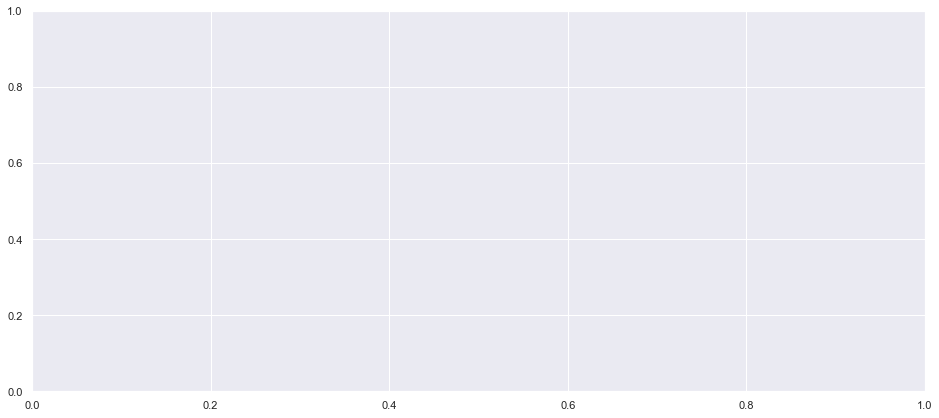

<Figure size 4320x1440 with 0 Axes>

In [74]:
from branca.element import Figure
from scipy.cluster.hierarchy import dendrogram, linkage
#Average
fig= plt.subplots(figsize=(16,7))
Z = linkage(df_norm, method='average')
plt.figure(figsize=(60,20))
fig.subplots_adjust(right=3)
plt.xlabel('HoodID')
dendrogram(Z, labels=df_norm.index, color_threshold=5.5)
plt.axhline(y=5.5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [75]:
#Single
fig= plt.subplots
Z = linkage(df_norm, method='single')
plt.figure(figsize=(60,20))
fig.subplots_adjust(right=3)
plt.xlabel('HoodID')
dendrogram(Z, labels=df_norm.index, color_threshold=5.5)
plt.axhline(y=5.5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

AttributeError: 'function' object has no attribute 'subplots_adjust'

<Figure size 4320x1440 with 0 Axes>

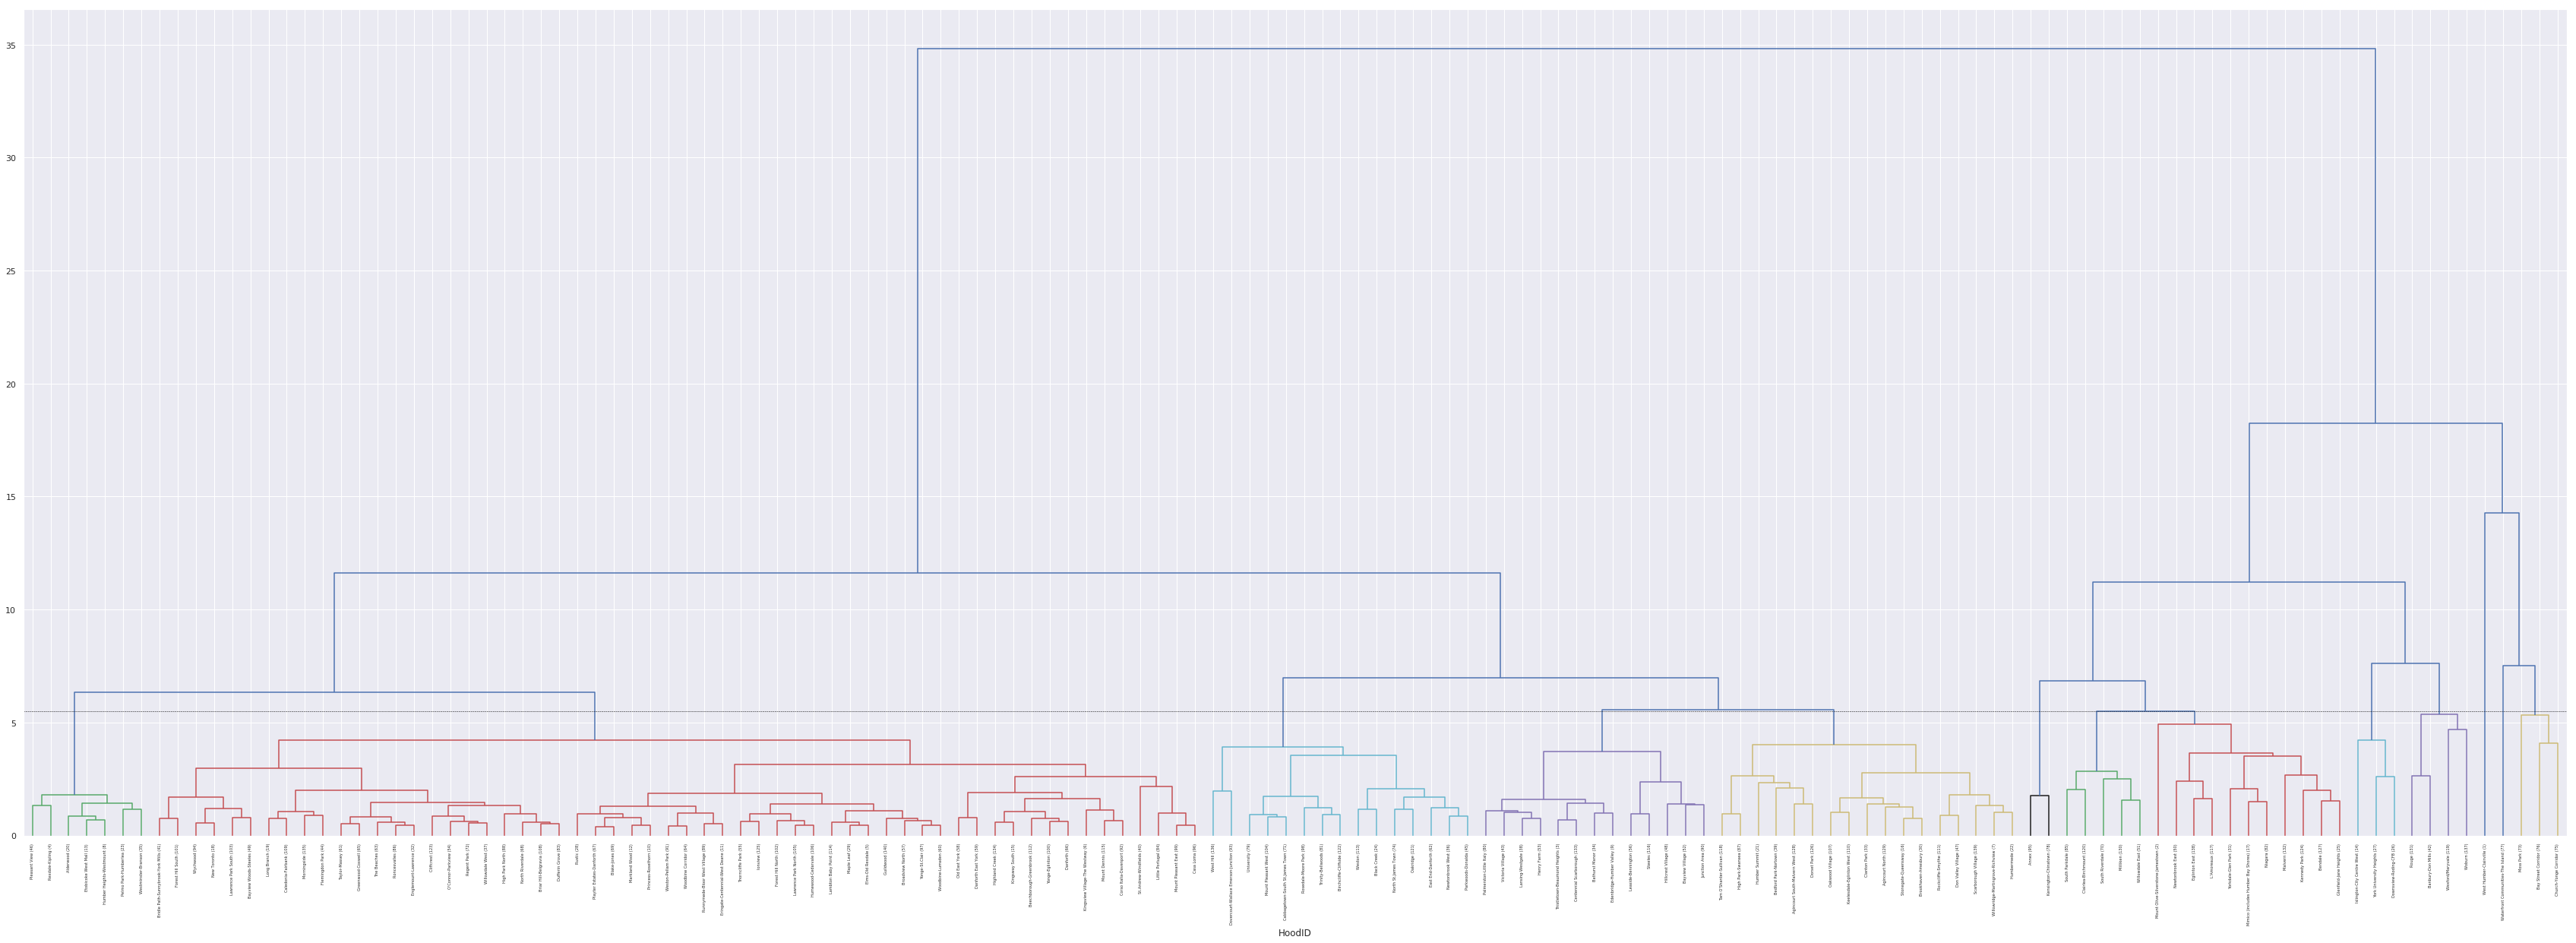

In [71]:
#Ward
Z = linkage(df_norm, method='ward')
plt.figure(figsize=(60,20))
fig.subplots_adjust(right=3)
plt.xlabel('HoodID')
dendrogram(Z, labels=df_norm.index, color_threshold=5.5)
plt.axhline(y=5.5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

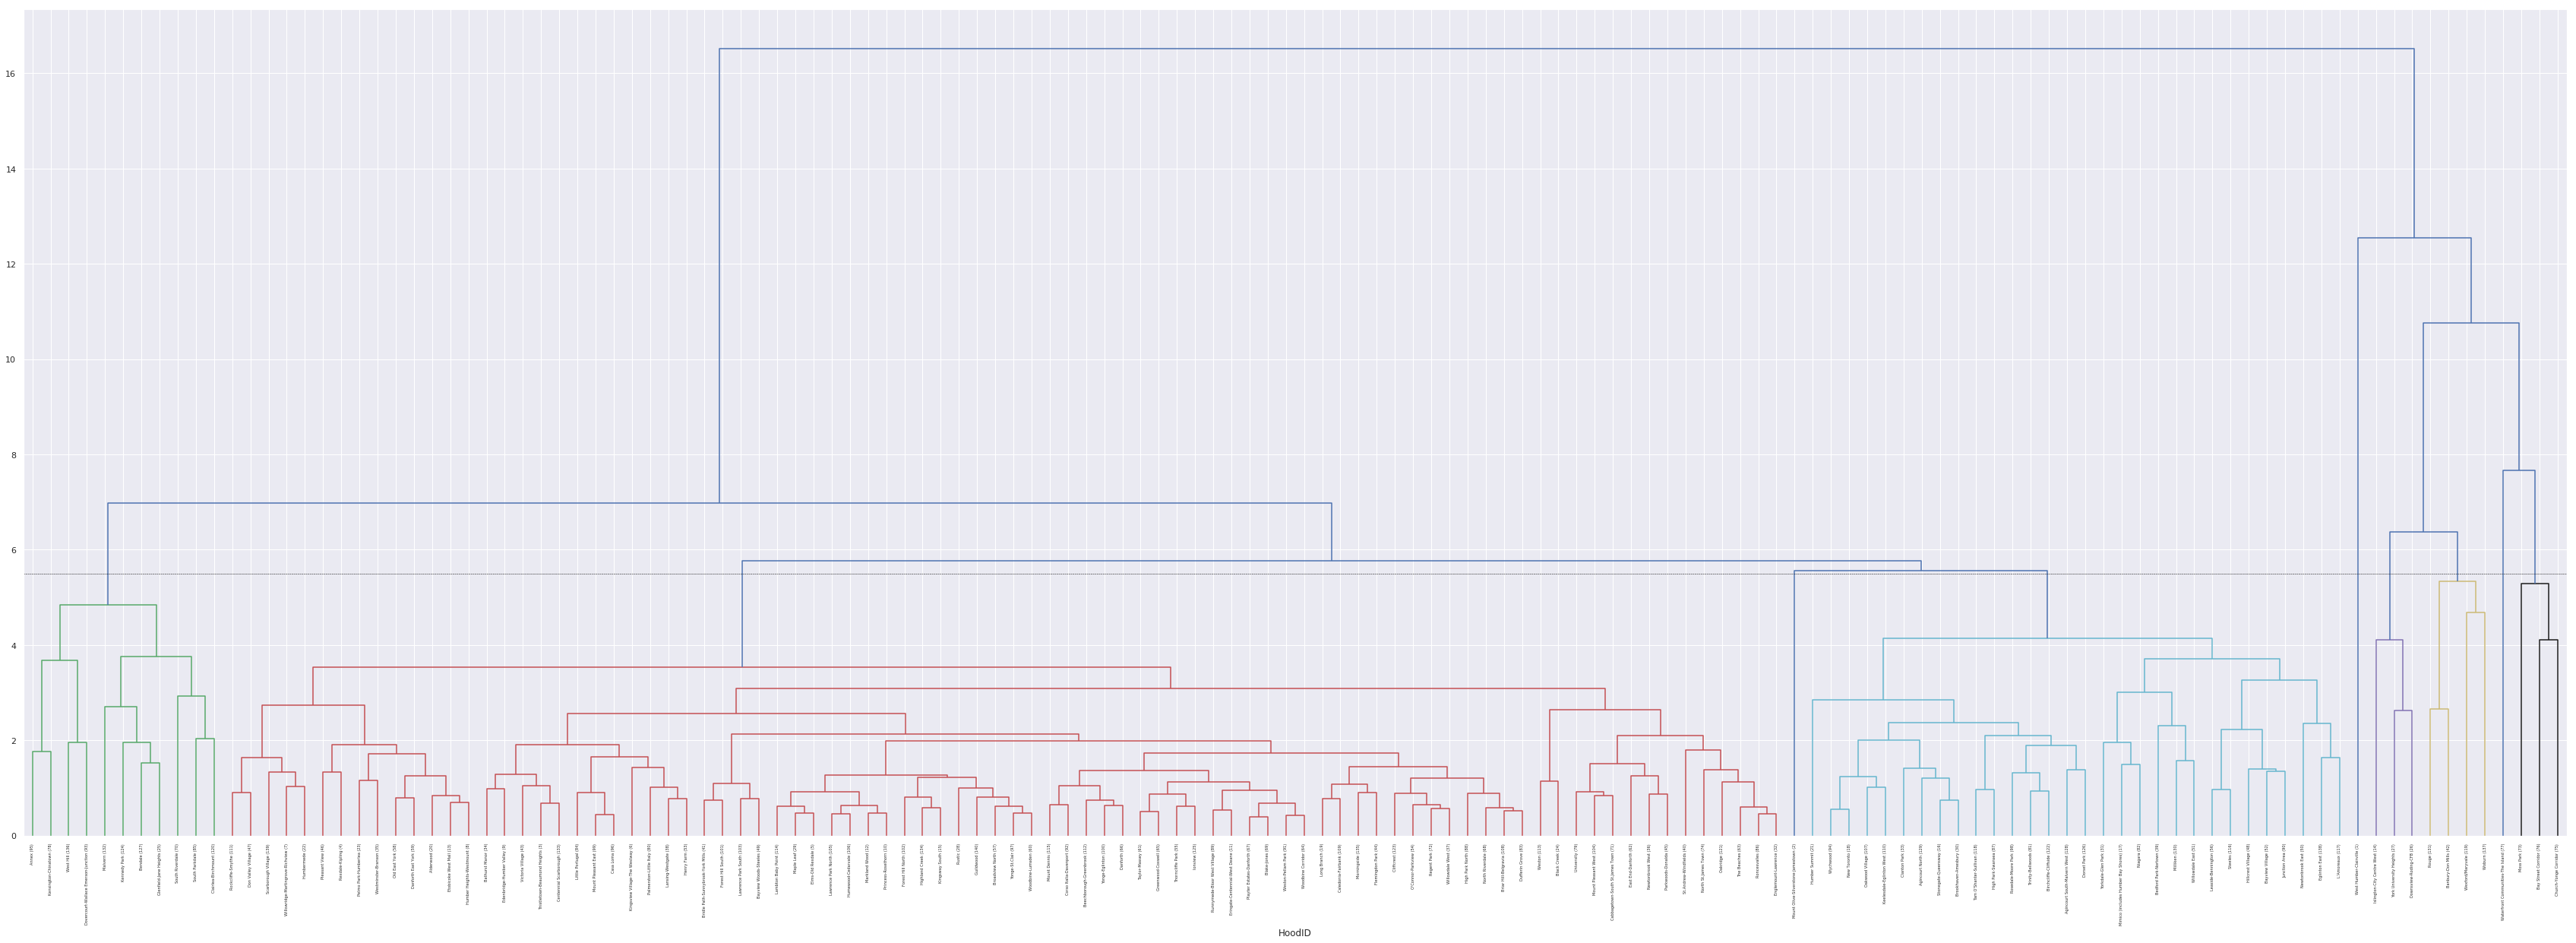

In [72]:
#Complete
Z = linkage(df_norm, method='complete')
plt.figure(figsize=(60,20))
fig.subplots_adjust(right=3)
plt.xlabel('HoodID')
dendrogram(Z, labels=df_norm.index, color_threshold=5.5)
plt.axhline(y=5.5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

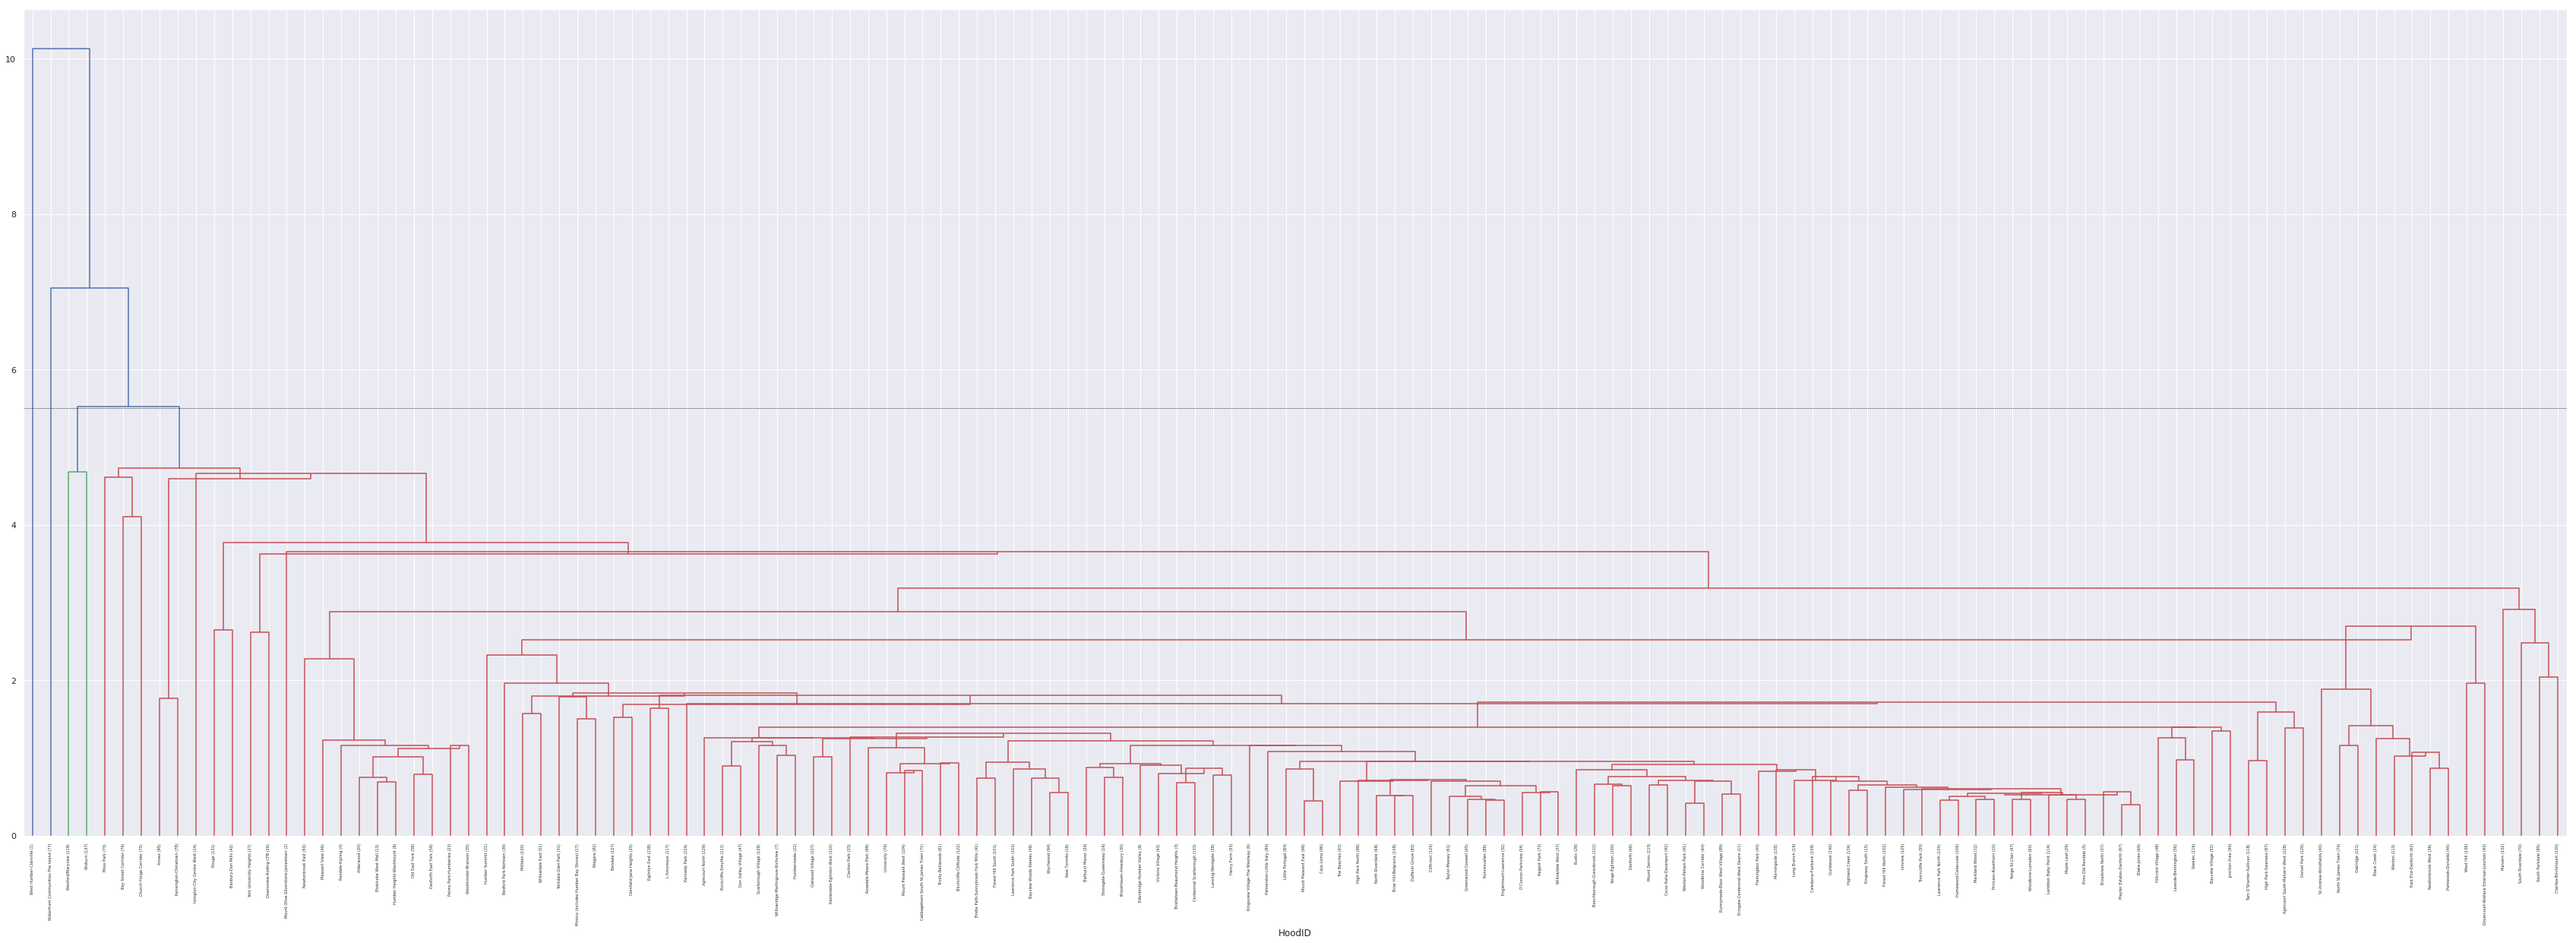

In [73]:
#Median
Z = linkage(df_norm, method='median')
plt.figure(figsize=(60,20))
fig.subplots_adjust(right=3)
plt.xlabel('HoodID')
dendrogram(Z, labels=df_norm.index, color_threshold=5.5)
plt.axhline(y=5.5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

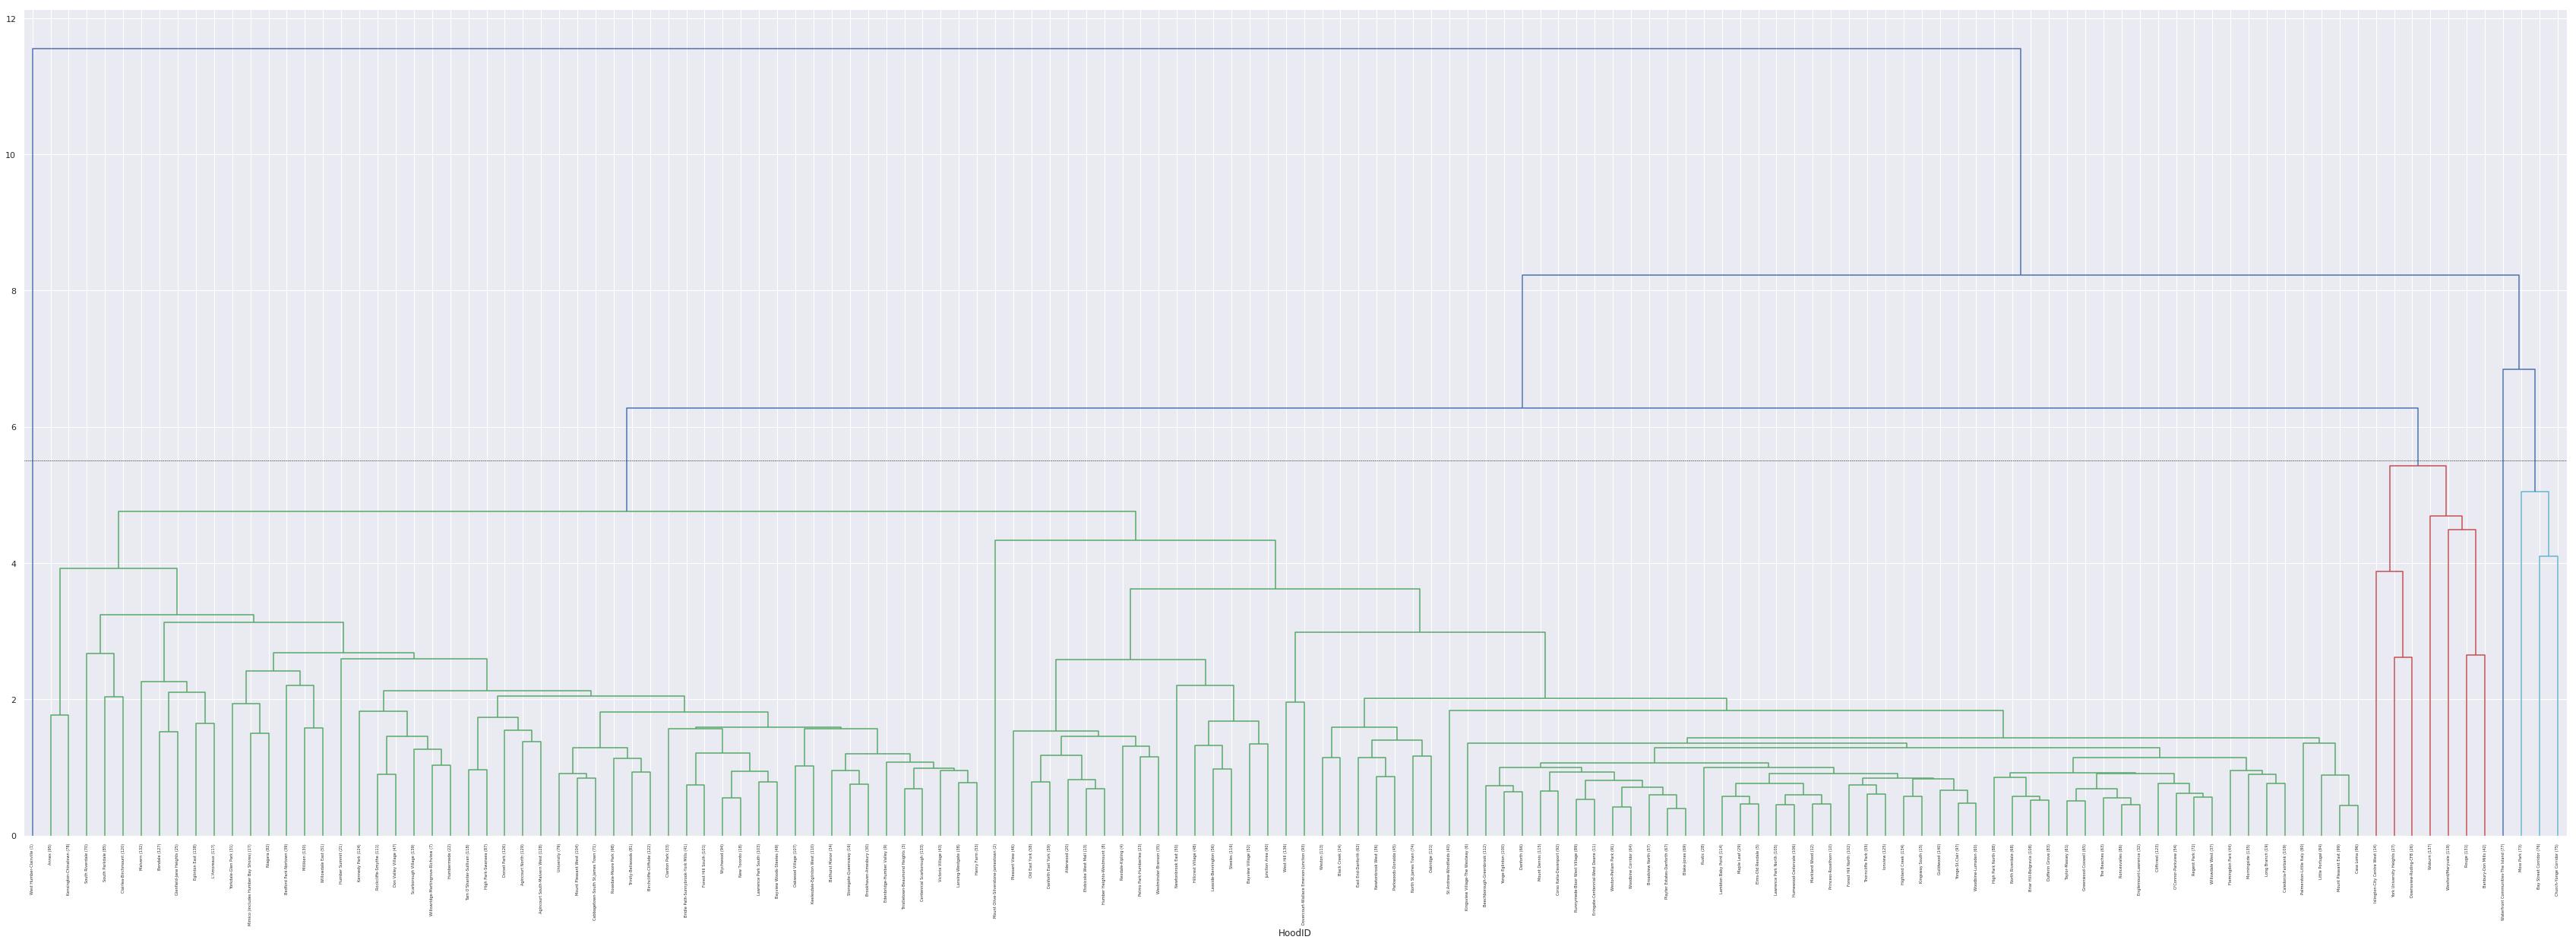

In [74]:
#Weighted
Z = linkage(df_norm, method='weighted')
plt.figure(figsize=(60,20))
fig.subplots_adjust(right=3)
plt.xlabel('HoodID')
dendrogram(Z, labels=df_norm.index, color_threshold=5.5)
plt.axhline(y=5.5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

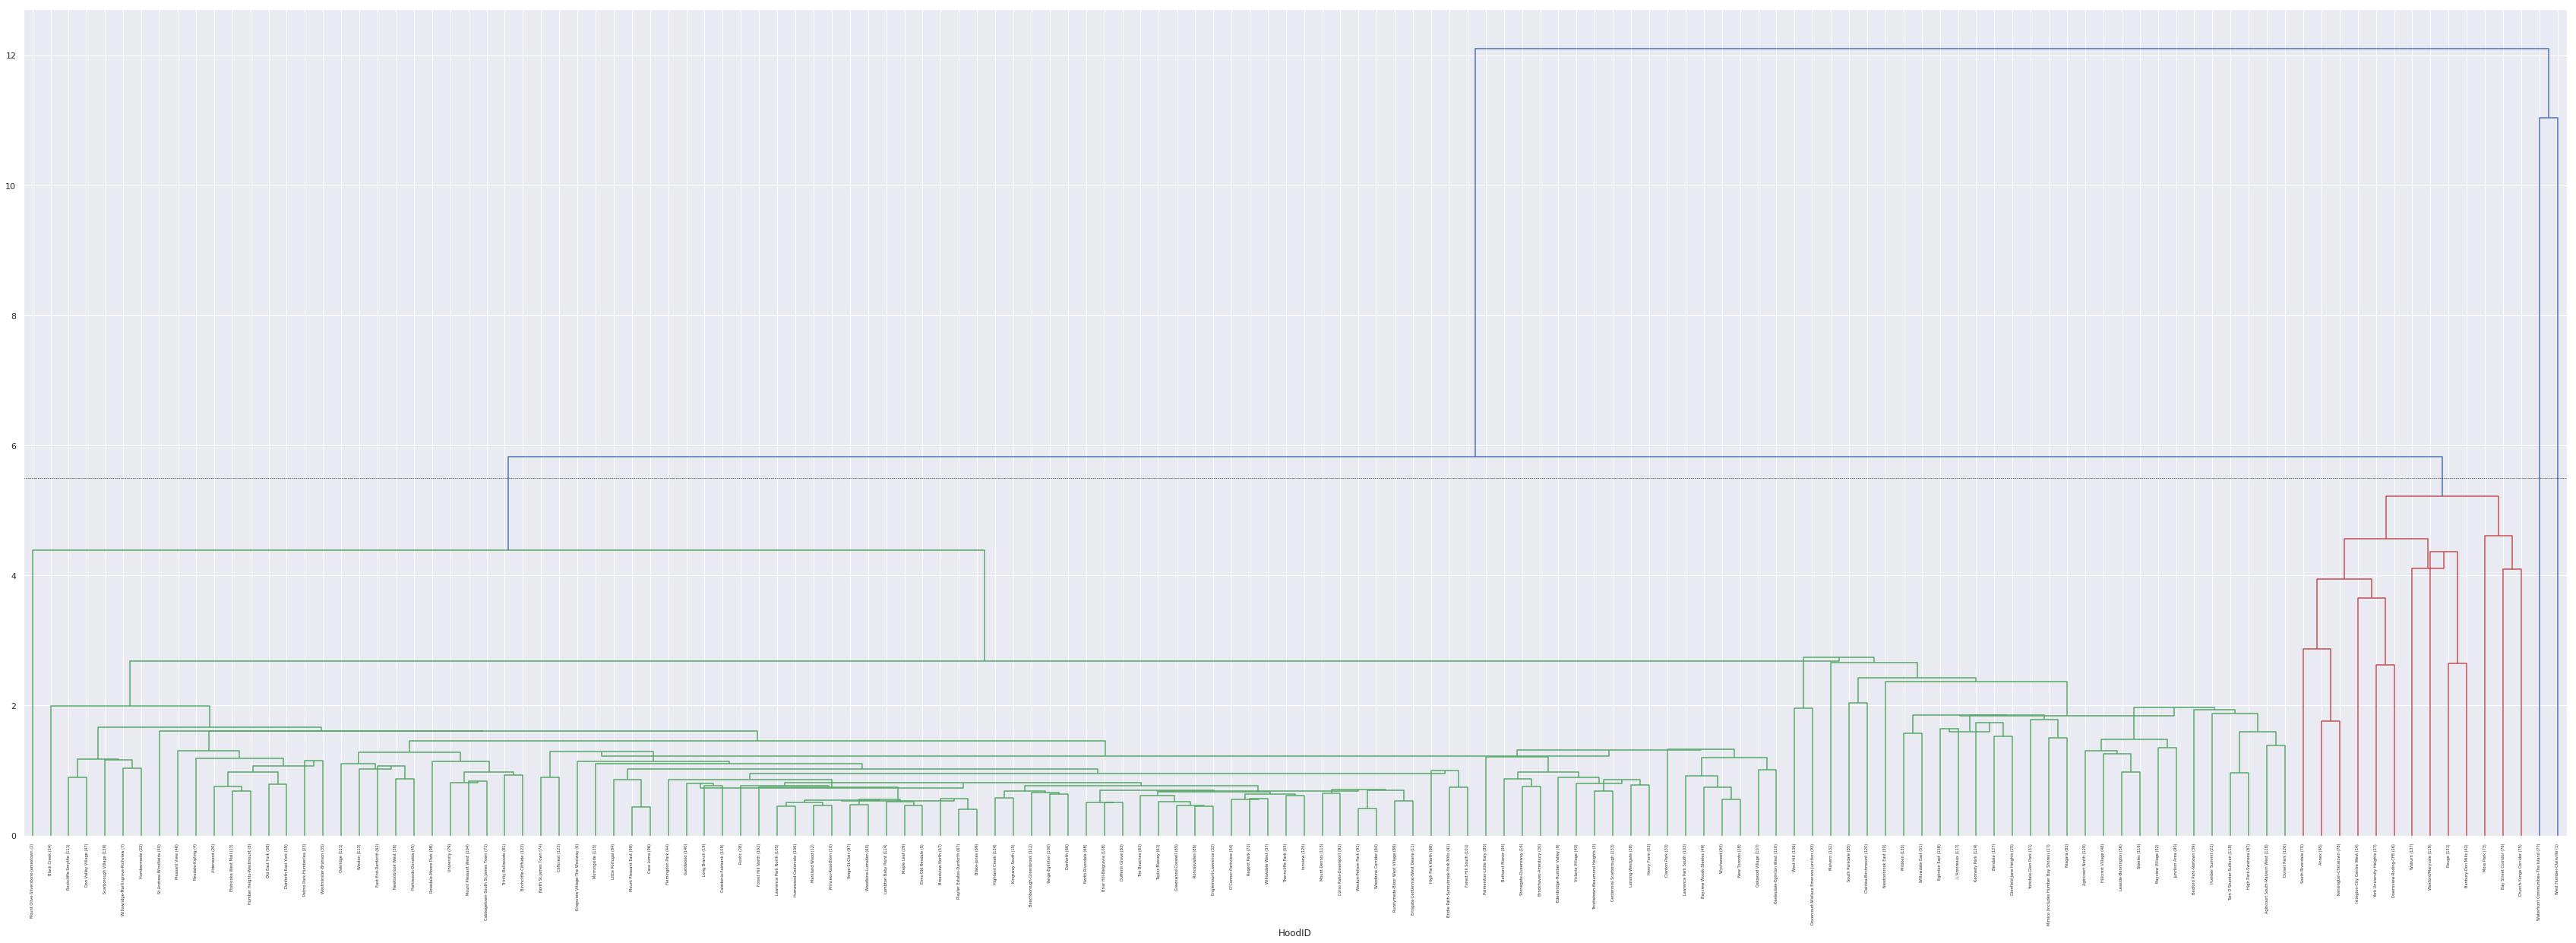

In [75]:
#Centroid
Z = linkage(df_norm, method='centroid')
plt.figure(figsize=(60,20))
fig.subplots_adjust(right=3)
plt.xlabel('HoodID')
dendrogram(Z, labels=df_norm.index, color_threshold=5.5)
plt.axhline(y=5.5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [76]:
from sklearn.cluster import KMeans

# Fit a k-Means clustering with k=6 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=df_norm.index)
print('\033[1m'+'k-Means cluster membership:'+'\033[0m')
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

k-Means cluster membership:


TypeError: sequence item 0: expected str instance, float found

In [77]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_norm.columns)
pd.set_option('precision', 3) # round to 3 decimal places
print(centroids)

   Assault  Auto Theft  Break and Enter  Fatal Collision  Major Collision  \
0    0.377       0.235            0.528            0.739            0.615   
1    2.538       1.992            2.363            1.917            2.565   
2   -0.406      -0.296           -0.443           -0.474           -0.497   

   Minimal Collision  Minor Collision  None Collision  Robbery  Theft Over  
0              0.562            0.427           0.663    0.433       0.326  
1              1.968            1.878           2.460    2.564       2.656  
2             -0.414           -0.355          -0.503   -0.429      -0.400  


(-0.5, 10)

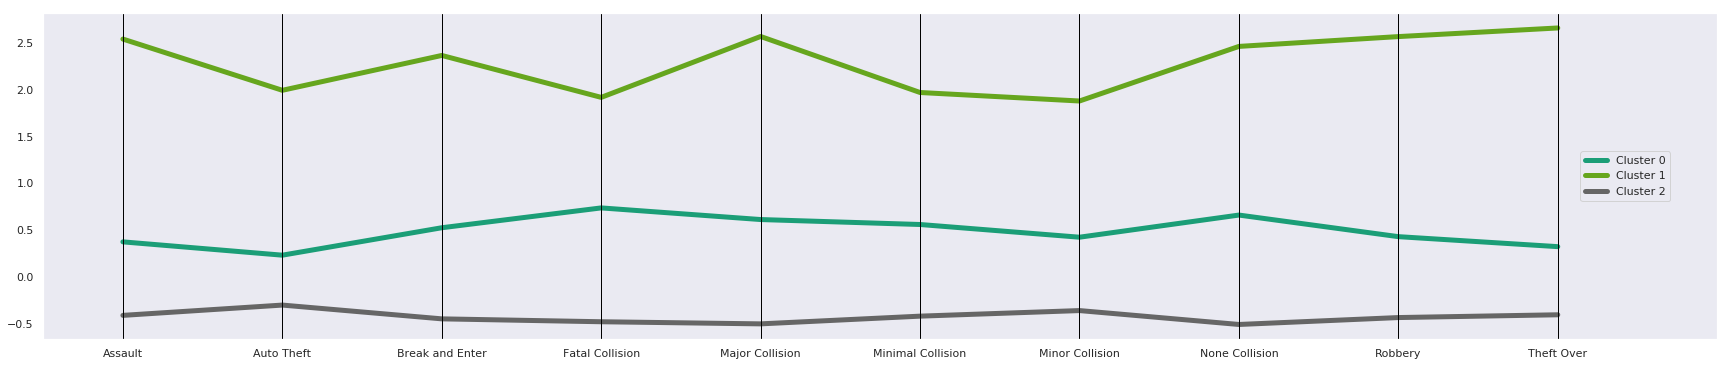

In [78]:
from pandas.plotting import parallel_coordinates
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(30,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.915, 0.5))
plt.xlim(-0.5,10)

High Risk Neighbourhoods: Cluster 1
* York University Heights (27)
* Moss Park (73)
* Waterfront Communities-The Island (77)
* West Humber-Clairville (1)
* Wexford/Maryvale (119)
* Woburn (137)
* Bay Street Corridor (76)
* Church-Yonge Corridor (75)
* Downsview-Roding-CFB (26)
* Islington-City Centre West (14)



Medium Risk Neighbourhoods: Cluster 0

*  Yorkdale-Glen Park (31), Malvern (132), Milliken (130), Mimico (includes Humber Bay Shores) (17), Mount Olive-Silverstone-Jamestown (2), Newtonbrook East (50), Niagara (82), Rockcliffe-Smythe (111), Rouge (131), South Parkdale (85), South Riverdale (70), Steeles (116), Tam O'Shanter-Sullivan (118), West Hill (136), Willowdale East (51), Agincourt North (129), Agincourt South-Malvern West (128), Annex (95), Banbury-Don Mills (42), Bedford Park-Nortown (39), Bendale (127), Birchcliffe-Cliffside (122), Clairlea-Birchmount (120), Don Valley Village (47), Dorset Park (126), Dovercourt-Wallace Emerson-Junction (93), Eglinton East (138), Glenfield-Jane Heights (25), High Park-Swansea (87), Humber Summit (21), Humbermede (22), Junction Area (90), Kennedy Park (124), Kensington-Chinatown (78), L'Amoreaux (117)


Low Risk Neighbourhoods: Cluster 2

* Wychwood (94), Yonge-Eglinton (100), Yonge-St.Clair (97), Lambton Baby Point (114), Lansing-Westgate (38), Lawrence Park North (105), Lawrence Park South (103), Leaside-Bennington (56), Little Portugal (84), Long Branch (19), Maple Leaf (29), Markland Wood (12), Morningside (135), Mount Dennis (115), Mount Pleasant East (99), Mount Pleasant West (104), New Toronto (18), Newtonbrook West (36), North Riverdale (68), North St.James Town (74), O'Connor-Parkview (54), Oakridge (121), Oakwood Village (107), Old East York (58), Palmerston-Little Italy (80), Parkwoods-Donalda (45), Pelmo Park-Humberlea (23), Playter Estates-Danforth (67), Pleasant View (46), Princess-Rosethorn (10), Regent Park (72), Rexdale-Kipling (4), Roncesvalles (86), Rosedale-Moore Park (98), Runnymede-Bloor West Village (89), Rustic (28), Scarborough Village (139), St.Andrew-Windfields (40), Stonegate-Queensway (16), Taylor-Massey (61), The Beaches (63), Thistletown-Beaumond Heights (3), Thorncliffe Park (55), Trinity-Bellwoods (81), University (79), Victoria Village (43), Westminster-Branson (35), Weston (113), Weston-Pellam Park (91), Willowdale West (37), Willowridge-Martingrove-Richview (7), Woodbine Corridor (64), Woodbine-Lumsden (60), Alderwood (20), Bathurst Manor (34), Bayview Village (52), Bayview Woods-Steeles (49), Beechborough-Greenbrook (112), Black Creek (24), Blake-Jones (69), Briar Hill-Belgravia (108), Bridle Path-Sunnybrook-York Mills (41), Broadview North (57), Brookhaven-Amesbury (30), Cabbagetown-South St.James Town (71), Caledonia-Fairbank (109), Casa Loma (96), Centennial Scarborough (133), Clanton Park (33), Cliffcrest (123), Corso Italia-Davenport (92), Danforth (66), Danforth East York (59), Dufferin Grove (83), East End-Danforth (62), Edenbridge-Humber Valley (9), Elms-Old Rexdale (5), Englemount-Lawrence (32), Eringate-Centennial-West Deane (11), Etobicoke West Mall (13), Flemingdon Park (44), Forest Hill North (102), Forest Hill South (101), Greenwood-Coxwell (65), Guildwood (140), Henry Farm (53), High Park North (88), Highland Creek (134), Hillcrest Village (48), Humber Heights-Westmount (8), Humewood-Cedarvale (106), Ionview (125), Keelesdale-Eglinton West (110), Kingsview Village-The Westway (6), Kingsway South (15)



In [79]:
memb

FIELD_7
Wychwood (94)                        2
Yonge-Eglinton (100)                 2
Yonge-St.Clair (97)                  2
York University Heights (27)         1
Yorkdale-Glen Park (31)              0
                                    ..
Kennedy Park (124)                   0
Kensington-Chinatown (78)            0
Kingsview Village-The Westway (6)    2
Kingsway South (15)                  2
L'Amoreaux (117)                     0
Length: 140, dtype: int32

In [80]:
df_memb=memb
df_memb=pd.DataFrame(df_memb)

df_memb['cluster'] = memb

In [81]:
risk_merged = regions.set_index('FIELD_7').join(df_memb)
risk_merged = risk_merged.reset_index()
risk_merged = risk_merged.fillna(0)
risk_merged.sample(5)

,FIELD_7,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,neighbourhood,0,cluster
9,Leaside-Bennington (56),2110,25886328,25926671,49885,56,56,Leaside-Bennington (56),0,0,-79.366,43.704,16491649,9.162e+06,20531.731,"POLYGON ((-79.3774895937259 43.71309106097515,...",leaside-bennington,2,2
19,Mount Dennis (115),2120,25886380,25926681,49885,115,115,Mount Dennis (115),0,0,-79.500,43.688,16491809,4.075e+06,9475.023,POLYGON ((-79.51328910369692 43.69338398653108...,mount dennis,2,2
116,Flemingdon Park (44),2217,25886693,25926778,49885,44,44,Flemingdon Park (44),0,0,-79.333,43.716,16493361,4.738e+06,11740.109,POLYGON ((-79.33790580188732 43.70769889179611...,flemingdon park,2,2
58,Trinity-Bellwoods (81),2159,25886965,25926720,49885,81,81,Trinity-Bellwoods (81),0,0,-79.415,43.650,16492433,3.306e+06,7385.141,POLYGON ((-79.42241029552947 43.64349155758946...,trinity-bellwoods,2,2
71,Woburn (137),2172,25886473,25926733,49885,137,137,Woburn (137),0,0,-79.229,43.767,16492641,2.366e+07,25089.815,POLYGON ((-79.21128034653891 43.75113187675843...,woburn,1,1


In [82]:
def risk_func(x):
    return {
        2: 0,
        0: 1,
        1: 2
    }[x]
    
risk_merged['risk']=risk_merged['cluster'].map(risk_func)


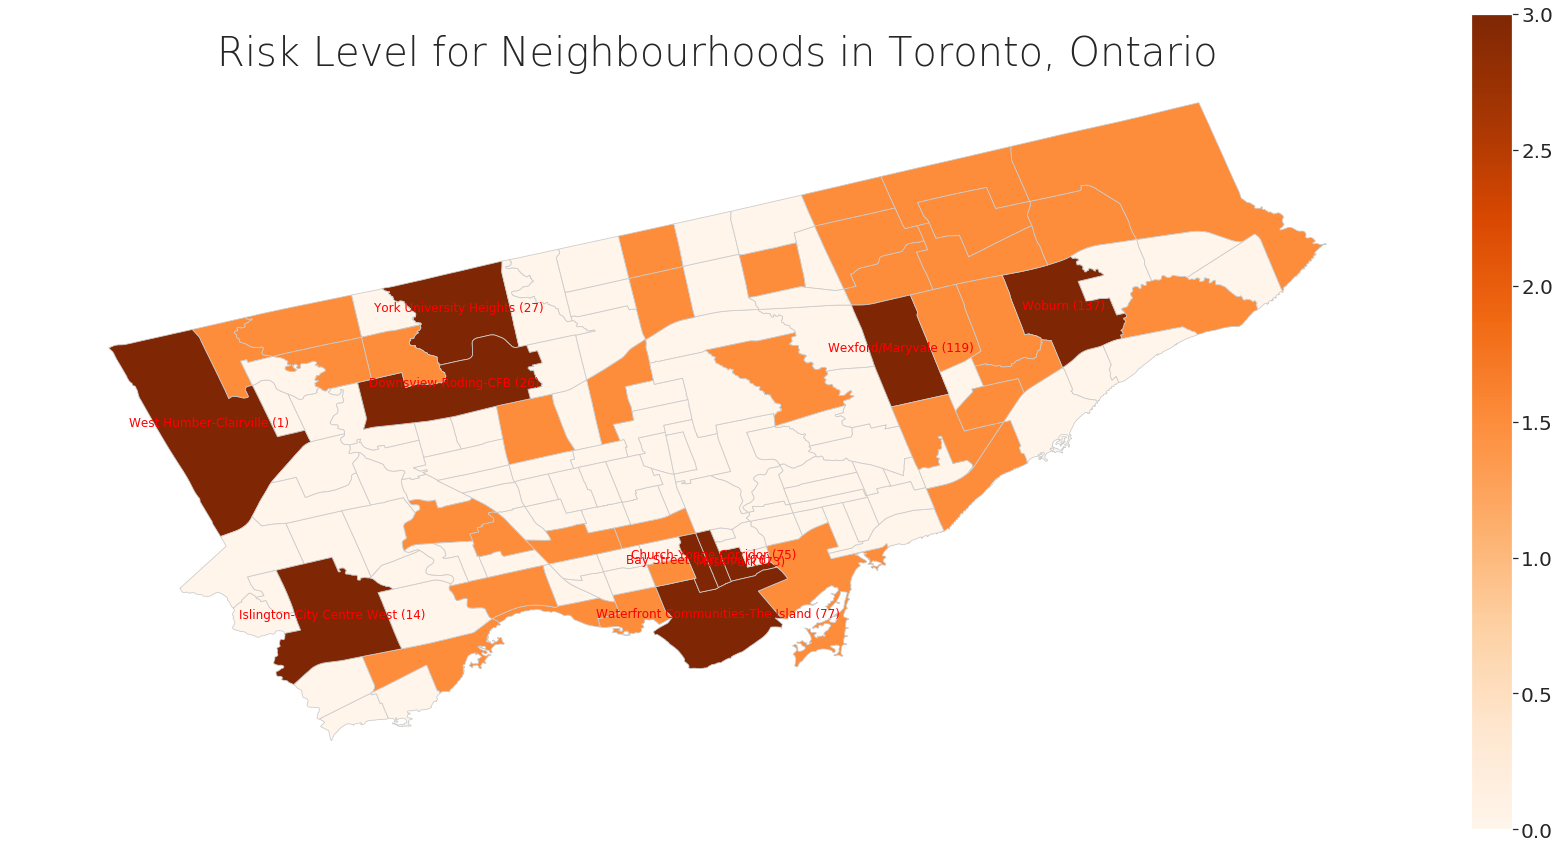

In [83]:
# we are using the maximum and minimum count values from the previous cell.
# setting additionally properties for the plot such as titles, turning of the axis for better visibility
# and setting the color scheme to look like a heat map.
fig, ax = plt.subplots(1, figsize=(30, 15))
ax.axis('off')
ax.set_title('Risk Level for Neighbourhoods in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})


# Create colorbar as a legend
# empty array for the data range
# add the colorbar to the figure
# set the color bar label text size
color = 'Oranges'
vmin, vmax = 0,3
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)


# actually plot the map
risk_merged.plot('risk', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in risk_merged.iterrows():
    if(row['risk'] > 1):
        plt.annotate(s=row['FIELD_7'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize='large', color='red', wrap=True)
plt.show()